In [3]:
file1 = open("full database.txt", "r")
str1=file1.read()
file1.close()

In [4]:
list1=str1.split('drug type')

In [5]:
list1[1]

'="biotech" created="2005-06-13" updated="2020-11-02">\n  <drugbank-id primary="true">DB00001</drugbank-id>\n  <drugbank-id>BTD00024</drugbank-id>\n  <drugbank-id>BIOD00024</drugbank-id>\n  <name>Lepirudin</name>\n  <description>Lepirudin is identical to natural hirudin except for substitution of leucine for isoleucine at the N-terminal end of the molecule and the absence of a sulfate group on the tyrosine at position 63. It is produced via yeast cells. Bayer ceased the production of lepirudin (Refludan) effective May 31, 2012.</description>\n  <cas-number>138068-37-8</cas-number>\n  <unii>Y43GF64R34</unii>\n  <state>liquid</state>\n  <groups>\n    <group>approved</group>\n  </groups>\n  <general-references>\n    <articles>\n      <article>\n        <ref-id>A1</ref-id>\n        <pubmed-id>16244762</pubmed-id>\n        <citation>Smythe MA, Stephens JL, Koerber JM, Mattson JC: A comparison of lepirudin and argatroban outcomes. Clin Appl Thromb Hemost. 2005 Oct;11(4):371-4.</citation>\n  

In [6]:
n=len(list1)
n

14316

# Processing data

In [7]:
import re
x=list1[1]
new=x.replace('\n','')
pattern=r"=\"biotech\".*>"
classification=re.findall(pattern,x)

#description1 = re.findall(pattern2,newlist[0])
#description1

In [8]:
import re
def find_eos(x):
    usetxt=x.replace('.','. ')
    newtxt=usetxt.replace('\n','')
    pattern=r"<drugbank-id primary=\"true\">.*</drugbank-id>"
    drugbank_id=re.findall(pattern,usetxt)[0][28:-14]
    pattern=r"<name>.*<"
    name=re.findall(pattern,usetxt)[0][6:-1]
    pattern=r"<description>.*<"
    description = re.findall(pattern,usetxt)
    if len(description)==0:
        description = ""
    else:
        description= re.findall(pattern,usetxt)[0][13:-1]
    pattern=r"<indication>.*<"
    indication=re.findall(pattern,usetxt)
    if len(indication)==0:
        indication = ""
    else:
        indication= re.findall(pattern,usetxt)[0][12:-1]
    pattern=r"<pharmacodynamics>.*<"
    pharmacodynamics = re.findall(pattern,usetxt)
    if len(pharmacodynamics)==0:
        pharmacodynamics = ""
    else:
         pharmacodynamics = re.findall(pattern,usetxt)[0][18:-1]
    pattern=r"<mechanism-of-action>.*<"
    mechanism_of_action =  re.findall(pattern,usetxt)
    if len(mechanism_of_action)==0:
        mechanism_of_action = ""
    else:
        mechanism_of_action = re.findall(pattern,usetxt)[0][21:-1]
    pattern=r"<toxicity>.*<"
    toxicity=re.findall(pattern,usetxt)
    if len(toxicity)==0:
        toxicity = ""
    else:
        toxicity = re.findall(pattern,usetxt)[0][10:-1]
    pattern=r"<metabolism>.*<"
    metabolism=re.findall(pattern,usetxt)
    if len(metabolism)==0:
        toxicity = ""
    else:
         metabolism = re.findall(pattern,usetxt)[0][12:-1]
    pattern=r"<absorption>.*<"
    absorption=re.findall(pattern,usetxt)
    if len(absorption)==0:
        absorption = ""
    else:
        absorption = re.findall(pattern,usetxt)[0][12:-1]
    pattern=r"<half-life>.*<"
    half_life=re.findall(pattern,usetxt)
    if len( half_life)==0:
         half_life = ""
    else:
         half_life= re.findall(pattern,usetxt)[0][11:-1]
    pattern=r"<route-of-elimination>.*<"
    route_of_elimination=re.findall(pattern,usetxt)
    if len(route_of_elimination)==0:
        route_of_elimination = ""
    else:
        route_of_elimination = re.findall(pattern,usetxt)[0][22:-1]
    pattern=r"<volume-of-distribution>.*</volume-of-distribution>"
    volume_of_distribution=re.findall(pattern,newtxt)
    if len( volume_of_distribution)==0:
         volume_of_distribution = ""
    else:
        volume_of_distribution = re.findall(pattern,newtxt)[0][24:-25]
    pattern=r"<classification>.*</classification>"
    classification=re.findall(pattern,newtxt)
    if len(classification)==0:
         classification = ""
    else:
        classification = re.findall(pattern,newtxt)[0][16:-17]
    pattern=r"<patents>.*</patents>"
    patents=re.findall(pattern,newtxt)
    if len(patents)==0:
         patlist = ""
    else:
        patients = re.findall(pattern,newtxt)[0][10:-11]
        patlist = str(patents).split('</patent>')[:-1]
    pattern=r"<food-interactions>.* </food-interactions>"
    food_interactions=re.findall(pattern,newtxt)
    if len(food_interactions)==0:
         food_interactions = ""
    else:
        food_interactions = re.findall(pattern,newtxt)[0][19:-20]
    pattern=r"<drug-interactions>.*</drug-interactions>"
    drug_interactions=re.findall(pattern,newtxt)
    if len(drug_interactions)==0:
         newlist = ""
    else:
        drug_interactions = re.findall(pattern,newtxt)[0][19:-20]
        newlist = str(drug_interactions).split('</drug-interaction>')[:-1]
    pattern=r"<pathways>.* </pathways>"
    pathways=re.findall(pattern,newtxt)
    if len(pathways)==0:
        pathways = ""
        pathlist=""
    else:
        pathways = re.findall(pattern,newtxt)[0][10:-11]
        pathlist=str(pathways).split('</pathway>')[:-1]
    return drugbank_id,name,description,indication,pharmacodynamics,mechanism_of_action,toxicity,metabolism,absorption,half_life,route_of_elimination,volume_of_distribution,classification,patlist,food_interactions,newlist,pathlist
drugbank_id,name,description,indication,pharmacodynamics,mechanism_of_action,toxicity,metabolism,absorption,half_life,route_of_elimination,volume_of_distribution,classification,patlist,food_interactions,newlist,pathlist= find_eos(list1[1])
foodlist=str(food_interactions).split('</food-interaction>')[:-1]
drugbank_id

'DB00001'

In [9]:
from collections import defaultdict
dictionary = {}
for i in range(1,len(list1)):
    x = list1[i]
    drugbank_id,name,description,indication,pharmacodynamics,mechanism_of_action,toxicity,metabolism,absorption,half_life,route_of_elimination,volume_of_distribution,classification,patients,food_interactions,newlist,pathlist=find_eos(x)
    index_name=drugbank_id
    dictionary[index_name]={}
    dictionary[index_name]['drugbank_id']=drugbank_id
    dictionary[index_name]['name']=name
    dictionary[index_name]['description']=description
    dictionary[index_name]['indication']=indication
    dictionary[index_name]['pharmacodynamics']=pharmacodynamics
    dictionary[index_name]['mechanism_of_action']=mechanism_of_action
    dictionary[index_name]['toxicity']=toxicity
    dictionary[index_name]['metabolism']=metabolism
    dictionary[index_name]['absorption']=absorption
    dictionary[index_name]['half_life']=half_life
    dictionary[index_name]['route_of_elimination']=route_of_elimination
    dictionary[index_name]['volume_of_distribution']=volume_of_distribution
    dictionary[index_name]['classification']={}
    pattern=r"<direct-parent>.*</direct-parent>"
    direct_parent=re.findall(pattern,classification)
    if len(direct_parent)==0:
        dictionary[index_name]['classification']['direct-parent']='None'
    else:
        dictionary[index_name]['classification']['direct-parent']= direct_parent[0][15:-16]
    pattern=r"<kingdom>.*</kingdom>"
    kingdom=re.findall(pattern,classification)
    if len(kingdom)==0:
        dictionary[index_name]['classification']['kingdom']='None'
    else:
        dictionary[index_name]['classification']['kingdom']= kingdom[0][9:-10]
    pattern=r"<superclass>.*</superclass>"
    superclass=re.findall(pattern,classification)
    if len(superclass)==0:
        dictionary[index_name]['classification']['superclass']='None'
    else:
        dictionary[index_name]['classification']['superclass']= superclass[0][12:-13]
    pattern=r"<class>.*</class>"
    Class=re.findall(pattern,classification)
    if len(Class)==0:
        dictionary[index_name]['classification']['class']='None'
    else:
        dictionary[index_name]['classification']['class']= Class[0][7:-8]
    pattern=r"<subclass>.*</subclass>"
    subclass=re.findall(pattern,classification)
    if len(subclass)==0:
        dictionary[index_name]['classification']['subclass']='None'
    else:
        dictionary[index_name]['classification']['subclass']= subclass[0][10:-11]
    dictionary[index_name]['food_interactions']={}
    key4=1
    foodlist=str(food_interactions).split('</food-interaction>')[:-1]
    if len(foodlist)==0:
        dictionary[index_name]['food_interactions']='None'
    else:
        for j in range(len(foodlist)):
            indexf='food_interaction'+str(key4)
            dictionary[index_name]['food_interactions'][indexf]=foodlist[j][22:-1]
            key4=key4+1
    dictionary[index_name]['pathways']={}
    dictionary[index_name]['drug_interactions']={}
    dictionary[index_name]['patients']={}
    key1=1
    if len(pathlist)==0:
        dictionary[index_name]['pathways']='None'
    else:
        for j in range(len(pathlist)):
            index='pathways'+str(key1)
            pattern=r"<pathway>.*<drugs>"
            path=re.findall(pattern,pathlist[j])
            pattern=r"<smpdb-id>.*</smpdb-id>"
            smpdb_id=re.findall(pattern,str(path))[0][10:-11]
            #dictionary[index_name]['pathways'][index]['smpdb_id']=smpdb_id
            pattern=r"<name>.*</name>"
            namep=re.findall(pattern,str(path))[0][6:-7]
            #dictionary[index_name]['pathways'][index]['name']=namep
            pattern=r"<category>.*</category>"
            category=re.findall(pattern,str(path))[0][10:-11]
            dictionary[index_name]['pathways'][index]={'smpdb_id':smpdb_id,'name of pathway':namep,'category of pathway':category}
            pattern=r"<drugs>.* </drugs>"
            drug=re.findall(pattern,pathlist[j])[0][7:-8]
            druglist=str(drug).split('</drug>')[:-1]
            key3=1
            for i in range(len(druglist)):
                indexn='drugs'+str(key3)
                pattern = r"<drugbank-id>.*</drugbank-id>"
                drugbank_id = re.findall(pattern,druglist[i])[0][13:-14]
                pattern=r"<name>.*</name>"
                name = re.findall(pattern,druglist[i])[0][6:-7]
                dictionary[index_name]['pathways'][index][indexn]={'drugbank_id in pathway':drugbank_id,'name in pathway':name}
                key3=key3+1
            pattern=r"<enzymes>.* </enzymes>"
            enzymes=re.findall(pattern,pathlist[j])
            if len(enzymes)==0:
                enzymes=""
                dictionary[index_name]['pathways'][index]['enzymes']='None'
            else:
                enzymes=re.findall(pattern,pathlist[j])[0][9:-10]
                enzlist = str(enzymes).split('</uniprot-id>')[:-1]
                key0=1
                for i in range(len(enzlist)):
                    indexe='enzymes'+str(key0)
                    uniprot_id=enzlist[i][20:]
                    dictionary[index_name]['pathways'][index][indexe]={'uniprot-id':uniprot_id}
                    key0=key0+1
            key1=key1+1
    key=1
    if len(newlist)==0:
        dictionary[index_name]['drug_interactions']='None'
    else:
        for j in range(len(newlist)):
            index = 'drug_interaction'+str(key)
            pattern = r"<drugbank-id>.*</drugbank-id>"
            match = re.findall(pattern,newlist[j])
            drug_bank_id = match[0][13:-14]
            pattern1=r"<name>.*</name>"
            name1 = re.findall(pattern1,newlist[j])
            if len(name1)==0:
                name1=''
            else:
                name1 = re.findall(pattern1,newlist[j])[0][6:-7]
            pattern2=r"<description>.*</description>"
            description1 = re.findall(pattern2,newlist[j])[0][13:-14]
            dictionary[index_name]['drug_interactions'][index]={'drug_bank_id in DDI':drug_bank_id,'name in DDI':name1,'description in DDI':description1}
            key=key+1
    #key2=1
    if len(patlist)==0:
        dictionary[index_name]['patients']='None'
    else:
        #for j in range(len(patlist)):
            #index = 'patient'+str(key2)
        pattern = r"<approved>.*</approved>"
        date1 = re.findall(pattern,patlist[0])[0][10:-11]
        pattern = r"<expires>.*</expires>"
        date2 = re.findall(pattern,patlist[0])[0][9:-10]
        dictionary[index_name]['patients']={'approved_date':date1,'expires':date2}
        #key2=key2+1
    
            
    
    
    
    
    
    

In [10]:
dictionary.keys()

dict_keys(['DB00001', 'DB00002', 'DB00003', 'DB00004', 'DB00005', 'DB00006', 'DB00007', 'DB00008', 'DB00009', 'DB00010', 'DB00011', 'DB00012', 'DB00013', 'DB00014', 'DB00015', 'DB00016', 'DB00017', 'DB00018', 'DB00019', 'DB00020', 'DB00022', 'DB00023', 'DB00024', 'DB00025', 'DB00026', 'DB00027', 'DB00028', 'DB00029', 'DB00030', 'DB00031', 'DB00032', 'DB00033', 'DB00034', 'DB00035', 'DB00036', 'DB00038', 'DB00039', 'DB00040', 'DB00041', 'DB00042', 'DB00043', 'DB00044', 'DB00045', 'DB00046', 'DB00047', 'DB00048', 'DB00049', 'DB00050', 'DB00051', 'DB00052', 'DB00053', 'DB00054', 'DB00055', 'DB00056', 'DB00057', 'DB00058', 'DB00059', 'DB00060', 'DB00061', 'DB00062', 'DB00063', 'DB00065', 'DB00066', 'DB00067', 'DB00068', 'DB00069', 'DB00070', 'DB00071', 'DB00072', 'DB00073', 'DB00074', 'DB00075', 'DB00076', 'DB00078', 'DB00080', 'DB00081', 'DB00082', 'DB00083', 'DB00085', 'DB00086', 'DB00087', 'DB00088', 'DB00089', 'DB00090', 'DB00091', 'DB00092', 'DB00093', 'DB00094', 'DB00095', 'DB00097',

In [11]:
dictionary['DB16109']

{'drugbank_id': 'DB16109',
 'name': 'GED-0507-34-Levo',
 'description': 'GED-0507-34-Levo is under investigation in clinical trial NCT02808390 (Efficacy and Safety Study of Ged-0507-34-levo for Treatment of UC). ',
 'indication': '',
 'pharmacodynamics': '',
 'mechanism_of_action': '',
 'toxicity': '',
 'metabolism': [],
 'absorption': '',
 'half_life': '',
 'route_of_elimination': '',
 'volume_of_distribution': '',
 'classification': {'direct-parent': 'None',
  'kingdom': 'None',
  'superclass': 'None',
  'class': 'None',
  'subclass': 'None'},
 'food_interactions': 'None',
 'pathways': 'None',
 'drug_interactions': 'None',
 'patients': {'approved_date': '1993-01-19', 'expires': '2010-01-19'}}

# Remove most likely occurance word

In [12]:
from nltk.corpus import stopwords
import nltk

In [13]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shaoyumeng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [15]:
from collections import Counter

In [16]:
#trying to find all the most likely occurance word
#Here we didn't run all the 'name' and 'class' key since it is meaningfulless to run them
des=''
ind=''
pha=''
mec=''
tox=''
met=''
#hal=''
abso=''
rou=''
vol=''
#for i in range(1,len(list1)):

for index_name in dictionary.keys():
    newdes = dictionary[index_name]['description']
    des = des+""+newdes
    newind = dictionary[index_name]['indication']
    ind = ind+""+newind
    newpha= dictionary[index_name]['pharmacodynamics']
    pha=pha+""+newpha
    newmec = dictionary[index_name]['mechanism_of_action']
    mec=mec+""+newmec
    newtox = dictionary[index_name]['toxicity']
    tox=tox+""+newtox
    newmet= dictionary[index_name]['metabolism']
    met=met+""+str(newmet)
    newabso = dictionary[index_name]['absorption']
    abso=abso+""+newabso
    #newhal = dictionary[index_name]['half_life']
    #hal=hal+""+newhal
    newrou = dictionary[index_name]['route_of_elimination']
    rou=rou+""+newrou
    #newvol = dictionary[index_name]['volume_of_distribution']
    #vol=vol+""+newvol

    

In [17]:
des= re.split('\W+', des.lower())
fdistdes = Counter(des)
ind= re.split('\W+', ind.lower())
fdistind = Counter(ind)
pha= re.split('\W+', pha.lower())
fdistpha = Counter(pha)
mec=re.split('\W+', mec.lower())
fdistmec = Counter(mec)
tox=re.split('\W+', tox.lower())
fdisttox = Counter(tox)
abso=re.split('\W+', abso.lower())
fdistabso = Counter(abso)
#hal=hal.replace('(',' ').replace(')',' ').replace(':',' ').replace('[',' ').replace(']',' ').replace('-',' ').replace('#',' ').replace('/',' ').replace('&',' ').replace('*',' ').replace(',',' ').replace('_',' ').replace(';',' ').replace('%',' ').replace('.',' ')
#hal=str(hal).split(" ")
#fdisthal = Counter(hal)
#rou=re.split('\W+', rou.lower())
#fdistrou = Counter(rou)
#vol=vol.replace('(',' ').replace(')',' ').replace(':',' ').replace('[',' ').replace(']',' ').replace('-',' ').replace('#',' ').replace('/',' ').replace('&',' ').replace('*',' ').replace(',',' ').replace('_',' ').replace(';',' ').replace('%',' ').replace('.',' ')
#vol=re.split(r' |:',str(vol))
#vol=str(vol).split(" ")
#fdistvol= Counter(vol)

In [18]:
total = fdistdes + fdistind + fdistpha + fdisttox + fdistabso 

In [19]:
total.most_common()[-1000:-1]

[('6862', 1),
 ('7535', 1),
 ('a189360', 1),
 ('tractlevorphanol', 1),
 ('56µg', 1),
 ('949', 1),
 ('1049ng', 1),
 ('9694', 1),
 ('492ng', 1),
 ('a188168', 1),
 ('incompletelyoral', 1),
 ('1343ng', 1),
 ('a187400', 1),
 ('1063', 1),
 ('a190267', 1),
 ('equates', 1),
 ('a177634', 1),
 ('f4522', 1),
 ('l6100', 1),
 ('administrationabsolute', 1),
 ('periochips', 1),
 ('l9019rapidly', 1),
 ('1526ng', 1),
 ('2443ng', 1),
 ('intracavitary', 1),
 ('shbg', 1),
 ('tbg', 1),
 ('ensuing', 1),
 ('a184940', 1),
 ('a189459', 1),
 ('l11139', 1),
 ('0192', 1),
 ('8032h', 1),
 ('6830', 1),
 ('2161ng', 1),
 ('186h', 1),
 ('2094', 1),
 ('0417h', 1),
 ('4391', 1),
 ('1567ng', 1),
 ('415h', 1),
 ('0726', 1),
 ('3578h', 1),
 ('3611', 1),
 ('3436ng', 1),
 ('624h', 1),
 ('absorbedabsorption', 1),
 ('897pg', 1),
 ('240h', 1),
 ('041pg', 1),
 ('fourfold', 1),
 ('biovaility', 1),
 ('a182564', 1),
 ('a188802', 1),
 ('yielded', 1),
 ('tractthere', 1),
 ('487', 1),
 ('3pg', 1),
 ('31h', 1),
 ('of3895', 1),
 ('1423p

In [20]:
total.most_common()

[('the', 35633),
 ('of', 34441),
 ('and', 23194),
 ('a', 21272),
 ('in', 20728),
 ('is', 20062),
 ('to', 19669),
 ('as', 11446),
 ('compounds', 9820),
 ('are', 8377),
 ('for', 8371),
 ('with', 8071),
 ('organic', 6963),
 ('this', 6772),
 ('compound', 6148),
 ('known', 6147),
 ('these', 6099),
 ('class', 5964),
 ('an', 5910),
 ('treatment', 5865),
 ('belongs', 5748),
 ('it', 5535),
 ('or', 5516),
 ('used', 5167),
 ('by', 5128),
 ('containing', 4233),
 ('that', 4007),
 ('has', 3763),
 ('gt', 3676),
 ('which', 3503),
 ('lt', 3502),
 ('group', 3438),
 ('from', 2833),
 ('been', 2777),
 ('ring', 2746),
 ('2', 2688),
 ('1', 2595),
 ('patients', 2595),
 ('be', 2511),
 ('acid', 2479),
 ('at', 2386),
 ('use', 2126),
 ('also', 1999),
 ('on', 1940),
 ('was', 1939),
 ('not', 1891),
 ('clinical', 1886),
 ('drug', 1865),
 ('sub', 1863),
 ('cancer', 1797),
 ('under', 1764),
 ('amino', 1729),
 ('acids', 1722),
 ('i', 1716),
 ('oral', 1679),
 ('3', 1615),
 ('5', 1574),
 ('may', 1552),
 ('effects', 1524)

In [21]:
import numpy as np

In [22]:
wordlistdes=list(total.keys())
invalid_words=list(stop_words)
pattern0=r'^[0-9]+[0-9]$'
regex=re.compile(pattern0)
dict_words =  ['organic','benzene', 'carbon','alpha', 'amino', 'moiety', 'allergenic', 'pollen', 'nitrogen', ' cancer', 'plant','drug', 'phenyl', 'bond', 
                'pyrimidine', 'receptor', 'protein', 'aromatic', 'allergenic', 'cells','receptor', 'human']
for word in wordlistdes:
    h=regex.match(word)
    if fdistdes[word]>800 or fdistdes[word]<=1 or h!=None or len(word)<3:
         invalid_words.append(word)
        
    else:
        if word[-1]=='s' and word[:-1] in dict_words:
            pass
        else:
            dict_words += [word]
        

In [23]:
dictionary[index_name]['pathways']

'None'

In [24]:
len(invalid_words)

25886

In [25]:
invalid_words=set(invalid_words)
pattern=r'^increas'
pattern2 = r'^decreas'
pattern3 = r'^inhibit'
pattern4 = r'^improv'
pattern5 = r'^prompt'
pattern6 = r'^declin'
direction_words=[]
regex=re.compile(pattern)
regex2=re.compile(pattern2)
regex3=re.compile(pattern3)
regex4=re.compile(pattern4)
regex5=re.compile(pattern5)
regex6=re.compile(pattern6)
for words in invalid_words:
    h=regex.match(words)
    h2=regex2.match(words)
    h3=regex3.match(words)
    h4=regex4.match(words)
    h5=regex5.match(words)
    h6=regex6.match(words)
    if h != None or h2 != None or h3 != None or h4 != None or h5 != None or h6 != None:
        direction_words.append(words)
invalid_words2  = [word for word in invalid_words if word not in  direction_words]
invalid_words2 += [dictionary[index_name]['name'].lower() for index_name in dictionary.keys()]
        

In [26]:
newdes = dictionary[index_name]['description']
newdes = re.split('\W+', newdes.lower())
newdes += re.split('\W+', dictionary[index_name]['indication'].lower())
newdes += re.split('\W+', dictionary[index_name]['pharmacodynamics'].lower())
newdes += re.split('\W+', dictionary[index_name]['mechanism_of_action'].lower())
newdes += re.split('\W+', dictionary[index_name]['toxicity'].lower())
newdes += re.split('\W+', dictionary[index_name]['absorption'].lower())
newdes = set(newdes).difference(set(invalid_words2))
dict(Counter(newdes))

{'marrow': 1,
 'using': 1,
 'organ': 1,
 'mechanisms': 1,
 'natural': 1,
 'result': 1,
 'signals': 1,
 'back': 1,
 'investigated': 1,
 'currently': 1,
 'transplantation': 1,
 'post': 1,
 'early': 1,
 'body': 1,
 'bloodstream': 1,
 'solid': 1,
 'macrophages': 1,
 'sepsis': 1,
 'bone': 1,
 'system': 1,
 'failure': 1,
 'dendritic': 1,
 'releasing': 1,
 'infusion': 1,
 'apoptotic': 1,
 'without': 1,
 'cells': 1,
 'normal': 1,
 'covid': 1,
 'thus': 1,
 'regulation': 1,
 'immune': 1,
 'novel': 1,
 'cytokine': 1,
 'associated': 1,
 'tumors': 1,
 'storm': 1,
 'suppression': 1,
 'therapy': 1,
 'complications': 1,
 'feed': 1,
 'patient': 1,
 'fewer': 1}

In [27]:
dictionary[index_name]['name'].lower()

'allocetra'

In [28]:
import pandas as pd

In [29]:
dict(Counter(newdes))

{'marrow': 1,
 'using': 1,
 'organ': 1,
 'mechanisms': 1,
 'natural': 1,
 'result': 1,
 'signals': 1,
 'back': 1,
 'investigated': 1,
 'currently': 1,
 'transplantation': 1,
 'post': 1,
 'early': 1,
 'body': 1,
 'bloodstream': 1,
 'solid': 1,
 'macrophages': 1,
 'sepsis': 1,
 'bone': 1,
 'system': 1,
 'failure': 1,
 'dendritic': 1,
 'releasing': 1,
 'infusion': 1,
 'apoptotic': 1,
 'without': 1,
 'cells': 1,
 'normal': 1,
 'covid': 1,
 'thus': 1,
 'regulation': 1,
 'immune': 1,
 'novel': 1,
 'cytokine': 1,
 'associated': 1,
 'tumors': 1,
 'storm': 1,
 'suppression': 1,
 'therapy': 1,
 'complications': 1,
 'feed': 1,
 'patient': 1,
 'fewer': 1}

In [30]:
set(newdes).difference(set(invalid_words2))

{'apoptotic',
 'associated',
 'back',
 'bloodstream',
 'body',
 'bone',
 'cells',
 'complications',
 'covid',
 'currently',
 'cytokine',
 'dendritic',
 'early',
 'failure',
 'feed',
 'fewer',
 'immune',
 'infusion',
 'investigated',
 'macrophages',
 'marrow',
 'mechanisms',
 'natural',
 'normal',
 'novel',
 'organ',
 'patient',
 'post',
 'regulation',
 'releasing',
 'result',
 'sepsis',
 'signals',
 'solid',
 'storm',
 'suppression',
 'system',
 'therapy',
 'thus',
 'transplantation',
 'tumors',
 'using',
 'without'}

In [31]:
#for i in range(1,len(list1)):
list_words = {}
for index_name in dictionary.keys():
    newdes = dictionary[index_name]['description']
    newdes = re.split('\W+', newdes.lower())
    newdes += re.split('\W+', dictionary[index_name]['indication'].lower())
    newdes += re.split('\W+', dictionary[index_name]['pharmacodynamics'].lower())
    newdes += re.split('\W+', dictionary[index_name]['mechanism_of_action'].lower())
    newdes += re.split('\W+', dictionary[index_name]['toxicity'].lower())
    newdes += re.split('\W+', dictionary[index_name]['absorption'].lower())
    newdes = set(newdes).difference(set(invalid_words2))
    list_words[index_name] = dict(Counter(newdes))


In [32]:
list_words[index_name]

{'marrow': 1,
 'using': 1,
 'organ': 1,
 'mechanisms': 1,
 'natural': 1,
 'result': 1,
 'signals': 1,
 'back': 1,
 'investigated': 1,
 'currently': 1,
 'transplantation': 1,
 'post': 1,
 'early': 1,
 'body': 1,
 'bloodstream': 1,
 'solid': 1,
 'macrophages': 1,
 'sepsis': 1,
 'bone': 1,
 'system': 1,
 'failure': 1,
 'dendritic': 1,
 'releasing': 1,
 'infusion': 1,
 'apoptotic': 1,
 'without': 1,
 'cells': 1,
 'normal': 1,
 'covid': 1,
 'thus': 1,
 'regulation': 1,
 'immune': 1,
 'novel': 1,
 'cytokine': 1,
 'associated': 1,
 'tumors': 1,
 'storm': 1,
 'suppression': 1,
 'therapy': 1,
 'complications': 1,
 'feed': 1,
 'patient': 1,
 'fewer': 1}

In [33]:
X = pd.DataFrame.from_dict(list_words, orient= 'index',dtype=int).fillna(0)

/var/folders/hc/1cgnxlmd48594lvd03pfmtjm0000gn/T/ipykernel_29030/1114998040.py:1: FutureWarning: In a future version, passing float-dtype values containing NaN and an integer dtype will raise IntCastingNaNError (subclass of ValueError) instead of silently ignoring the passed dtype. To retain the old behavior, call Series(arr) or DataFrame(arr) without passing a dtype.
  X = pd.DataFrame.from_dict(list_words, orient= 'index',dtype=int).fillna(0)


In [34]:
X

,bleeding,reduce,molecule,may,natural,except,fibrinogen,end,thrombocytopenia,medicinal,...,clbs119,inosars,3415a,nct04386616,uttr1147a,mstt1041a,bnt162,nct04380701,02c,cd73
DB00001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00013,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00036,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00054,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00067,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DB12780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB12320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB11374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB11398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
stop_words_ddi=list(stop_words)
stop_words_ddi.append('risk') 
stop_words_ddi.append('severity')
stop_words_ddi.append('combination')
stop_words_ddi.append('combined')
stop_words_ddi.append('used')
stop_words_ddi.append('activities')
stop_words_ddi.append('may')
len(stop_words_ddi)

186

In [36]:
stop_words_ddi

['haven',
 'itself',
 'having',
 'below',
 "needn't",
 'the',
 'same',
 'shouldn',
 'of',
 'on',
 'too',
 'him',
 'more',
 'an',
 'by',
 'what',
 'ourselves',
 'weren',
 'own',
 'any',
 'couldn',
 'wasn',
 'until',
 'most',
 'further',
 'from',
 "that'll",
 "isn't",
 'am',
 'these',
 'against',
 'her',
 'had',
 'here',
 'no',
 "hadn't",
 'i',
 'then',
 'into',
 'if',
 "weren't",
 "wouldn't",
 'in',
 'under',
 'being',
 'you',
 'ma',
 'don',
 'y',
 'aren',
 "couldn't",
 'yourselves',
 'again',
 'herself',
 'out',
 'myself',
 'm',
 "hasn't",
 'she',
 'won',
 'we',
 'they',
 'when',
 'me',
 'd',
 'both',
 "mightn't",
 'because',
 'was',
 'hadn',
 'were',
 "you've",
 'his',
 'before',
 'mustn',
 'themselves',
 've',
 'be',
 'your',
 'some',
 'theirs',
 "haven't",
 'over',
 'yourself',
 'between',
 'about',
 'so',
 'as',
 'did',
 'each',
 'do',
 'hers',
 'doing',
 'that',
 "you'd",
 'to',
 'their',
 're',
 'been',
 "don't",
 "doesn't",
 'll',
 'will',
 "mustn't",
 "aren't",
 'or',
 'once',


In [37]:
all_foods = []
for index_name in dictionary.keys():
    
     if dictionary[index_name]['food_interactions']!='None':
        for j in dictionary[index_name]['food_interactions'].keys():
            all_foods += re.split('\W+', dictionary[index_name]['food_interactions'][j].lower())
             

In [38]:
all_foods

['avoid',
 'herbs',
 'and',
 'supplements',
 'with',
 'anticoagulant',
 'antiplatelet',
 'activity',
 'examples',
 'include',
 'garlic',
 'ginger',
 'bilberry',
 'danshen',
 'piracetam',
 'and',
 'ginkgo',
 'biloba',
 '',
 'avoid',
 'echinacea',
 '',
 'avoid',
 'herbs',
 'and',
 'supplements',
 'with',
 'anticoagulant',
 'antiplatelet',
 'activity',
 'examples',
 'include',
 'garlic',
 'ginger',
 'bilberry',
 'danshen',
 'piracetam',
 'and',
 'ginkgo',
 'biloba',
 '',
 'drink',
 'plenty',
 'of',
 'fluids',
 '',
 'avoid',
 'herbs',
 'and',
 'supplements',
 'with',
 'anticoagulant',
 'antiplatelet',
 'activity',
 'examples',
 'include',
 'garlic',
 'ginger',
 'bilberry',
 'danshen',
 'piracetam',
 'and',
 'ginkgo',
 'biloba',
 '',
 'avoid',
 'alcohol',
 '',
 'avoid',
 'herbs',
 'and',
 'supplements',
 'with',
 'anticoagulant',
 'antiplatelet',
 'activity',
 'examples',
 'include',
 'garlic',
 'ginger',
 'bilberry',
 'danshen',
 'piracetam',
 'and',
 'ginkgo',
 'biloba',
 '',
 'avoid',
 '

In [39]:
dictionary[index_name]['food_interactions']

'None'

In [40]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shaoyumeng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
#### Might use knwown resources to select the foods: https://vchoo.github.io/
flavor_df = pd.read_csv('flavordb.csv')
flavor_df

,Unnamed: 0,entity id,alias,synonyms,scientific name,category,molecules
0,0,1,bakery products,{'bakery products'},poacceae,bakery,"{27457, 7976, 31252, 26808, 22201, 26331}"
1,1,2,bread,{'bread'},poacceae,bakery,"{1031, 1032, 644104, 527, 8723, 31260, 15394, ..."
2,2,3,rye bread,{'rye bread'},rye,bakery,"{644104, 7824, 643731, 8468, 1049, 5372954, 80..."
3,3,4,wheaten bread,"{'soda farls', 'soda scones'}",wheat,bakery,"{5365891, 6915, 1146, 12170, 8082, 31251, 7958..."
4,4,5,white bread,{'white bread'},wheat,bakery,"{7361, 7362, 10883, 994, 11173, 5365891, 11559..."
...,...,...,...,...,...,...,...
345,345,346,lettuce,{'lettuce'},lettuce,vegetable,"{644104, 5352460, 527, 61455, 8723, 31260, 153..."
346,346,347,okra,"{'okro', 'ngombo', ""lady's fingers""}",abelmosch,vegetable,"{644104, 527, 8723, 31260, 15394, 6184, 1068, ..."
347,347,348,onion,{'bulb onion'},allium,vegetable,"{1031, 1032, 644104, 31245, 527, 5320722, 8723..."
348,348,349,shallot,{'shallot'},allium,vegetable,"{644104, 527, 8723, 31260, 15394, 5280804, 618..."


In [42]:
set(all_foods).difference(stop_words)

{'',
 'urinary',
 'clorindione',
 'relevant',
 'natural',
 'alimemazine',
 'meals',
 'protein',
 'stiripentol',
 'dotatate',
 'teeth',
 'magnesium',
 'testosterone',
 'half',
 'attenuate',
 'terfenadine',
 'vegetables',
 'delafloxacin',
 'mecasermin',
 'dofetilide',
 'wait',
 'regard',
 'juices',
 'deutetrabenazine',
 'pyridoxine',
 'migalastat',
 'sunlight',
 'antacids',
 'carotenoids',
 '10',
 'orally',
 'virologic',
 'lead',
 'pediatric',
 'active',
 'phendimetrazine',
 'inhibitors',
 'appreciably',
 'maximize',
 'fast',
 'activity',
 'irritating',
 'heart',
 'sprays',
 'colonoscopy',
 'quantity',
 'vortioxetine',
 'kaolin',
 'dabrafenib',
 'flow',
 'mediated',
 'tioguanine',
 'avoiding',
 'prolongation',
 'withdrawing',
 'tenoxicam',
 'preventing',
 'methylphenidate',
 'maraviroc',
 'density',
 'particularly',
 'applies',
 'vincristine',
 'disrupt',
 'acetate',
 'kinetics',
 'vemurafenib',
 'flibanserin',
 'flavonoids',
 'p',
 'palpitations',
 'monomethyl',
 '90',
 'letermovir',
 '

In [43]:
 foods=['garlic', 'ginger', 'bilberry ', 'alcohol',
         'piracetam', 'whitefish']

# check if any food matches (or is a substring of) an alias in the database
{f : any([f in alias for alias in flavor_df['alias']])
 for f in foods}

{'garlic': True,
 'ginger': True,
 'bilberry ': True,
 'alcohol': False,
 'piracetam': False,
 'whitefish': False}

In [44]:
list(flavor_df['alias'])

['bakery products',
 'bread',
 'rye bread',
 'wheaten bread',
 'white bread',
 'wholewheat bread',
 'wort',
 'arrack',
 'beer',
 'bantu beer',
 'brandy',
 'anise brandy',
 'apple brandy',
 'armagnac brandy',
 'blackberry brandy',
 'cherry brandy',
 'cognac brandy',
 'papaya brandy',
 'pear brandy',
 'plum brandy',
 'raspberry brandy',
 'weinbrand brandy',
 'gin',
 'rum',
 'whisky',
 'bourbon whisky',
 'canadian whisky',
 'finnish whisky',
 'japanese whisky',
 'malt whisky',
 'scotch whisky',
 'wine',
 'bilberry wine',
 'botrytized wine',
 'champagne',
 'cider',
 'plum wine',
 'port wine',
 'red wine',
 'rose wine',
 'sake',
 'sherry',
 'sparkling wine',
 'strawberry wine',
 'white wine',
 'coffee',
 'mate',
 'black tea',
 'green tea',
 'roibos tea',
 'barley',
 'crispbread',
 'malt',
 'oats',
 'rice',
 'corn',
 'corn oil',
 'popcorn',
 'sweetcorn',
 'butter',
 'buttermilk',
 'cheese',
 'blue cheese',
 'camembert cheese',
 'cheddar cheese',
 'comte cheese',
 'cottage cheese',
 'cream ch

In [45]:
food_interections={}
for index_name in dictionary.keys():
    newfood = []
    foodall=[]
    if dictionary[index_name]['food_interactions']!='None':
        for j in dictionary[index_name]['food_interactions'].keys():
            food1 = re.split('\W+', dictionary[index_name]['food_interactions'][j].lower())
            food1 = list(filter(None, food1))
            if len(food1)==2:
                fooda = food1[1]
                newfood.append(fooda)
            foodall = food1+foodall
        for word in foodall:
            for alias in list(flavor_df['alias']):
                if word == alias :
                    newfood.append(word)
            for category in list(flavor_df['category']):
                if len(word)!=0 and word[-1]=='s' and word[:-1] == category:
                        newfood.append(word[:-1])
    food_interections[index_name]=dict(Counter(set(newfood)))

In [46]:
food_interactions_x = pd.DataFrame.from_dict(food_interections, orient= 'index',dtype=int).fillna(0)
food_interactions_x

/var/folders/hc/1cgnxlmd48594lvd03pfmtjm0000gn/T/ipykernel_29030/606411261.py:1: FutureWarning: In a future version, passing float-dtype values containing NaN and an integer dtype will raise IntCastingNaNError (subclass of ValueError) instead of silently ignoring the passed dtype. To retain the old behavior, call Series(arr) or DataFrame(arr) without passing a dtype.
  food_interactions_x = pd.DataFrame.from_dict(food_interections, orient= 'index',dtype=int).fillna(0)


,ginger,garlic,bilberry,herb,echinacea,alcohol,grapefruit,wort,milk,fruit,...,coffee,bread,yogurt,avocado,parsley,celery,antacids,nuts,nut,butter
DB00001,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00006,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00009,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00013,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00015,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DB00999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB12834,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB01396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
DB04571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [47]:
food_interactions_x.columns

Index(['ginger', 'garlic', 'bilberry', 'herb', 'echinacea', 'alcohol',
       'grapefruit', 'wort', 'milk', 'fruit', 'tea', 'vegetable', 'beverage',
       'caffeine', 'soybean', 'beans', 'wine', 'cheese', 'orange', 'beer',
       'apple', 'fish', 'coffee', 'bread', 'yogurt', 'avocado', 'parsley',
       'celery', 'antacids', 'nuts', 'nut', 'butter'],
      dtype='object')

In [48]:
interactions = []
type_of_interaction_list =[]
interaction_types = {}
descrip=[]
for index_name in dictionary.keys():
    if dictionary[index_name]['drug_interactions']!='None':
        name1 = re.split('\W+',dictionary[index_name]['name'].lower())
        for index_j in dictionary[index_name]['drug_interactions'].keys():
            newdescrip=[]
            interactions += [[index_name, dictionary[index_name]['drug_interactions'][index_j]['drug_bank_id in DDI']]]
            description = re.split('\W+', dictionary[index_name]['drug_interactions'][index_j]['description in DDI'].lower())
            name2 = re.split('\W+',dictionary[index_name]['drug_interactions'][index_j]['name in DDI'].lower())
            #type_of_interaction_list += description
            pattern0=r'^[0-9]+[0-9]$'
            regex=re.compile(pattern0)
            for word in description:
                h=regex.match(word)
                if word not in stop_words_ddi and word not in name1 and word not in name2 and h==None and len(word)!=0 and len(word)!=1:
                    newdescrip.append(word) 
            #interaction_types[(index_name, dictionary[index_name]['drug_interactions'][index_j]['drug_bank_id in DDI'])] =  dict(Counter(description))
            interaction_types[(index_name, dictionary[index_name]['drug_interactions'][index_j]['drug_bank_id in DDI'])] =  dict(Counter(newdescrip))
            type_of_interaction_list += newdescrip

In [49]:
type_of_interaction_list = set(type_of_interaction_list)

In [50]:
interaction_types[('DB00001', 'DB06605')]

{'increase': 1, 'anticoagulant': 1}

In [51]:
type_of_interaction_list

{'a77',
 'absorption',
 'accommodation',
 'acidosis',
 'active',
 'adrenergic',
 'adverse',
 'agent',
 'aic',
 'alertness',
 'alpha',
 'amino',
 'amprenavir',
 'analgesic',
 'anemia',
 'angioedema',
 'angiogenesis',
 'antagonism',
 'anti',
 'anticholinergic',
 'anticoagulant',
 'anticonvulsant',
 'antihypertensive',
 'antiplatelet',
 'antipsychotic',
 'arrest',
 'arrhythmia',
 'arrhythmias',
 'arrhythmogenic',
 'arthritis',
 'atrioventricular',
 'av',
 'binding',
 'bioavailability',
 'bleeding',
 'block',
 'blockade',
 'blocking',
 'bradycardia',
 'bradycardic',
 'breath',
 'bronchoconstrictory',
 'bronchodilatory',
 'bronchospasm',
 'bruising',
 'carboxamide',
 'cardiac',
 'cardiodepressant',
 'cardiotoxic',
 'cardiotoxicity',
 'cardiovascular',
 'cause',
 'cbz',
 'central',
 'cerebri',
 'change',
 'cns',
 'colitis',
 'concentration',
 'confusion',
 'congestive',
 'constipating',
 'constipation',
 'convulsion',
 'could',
 'cpk',
 'creatine',
 'creatinine',
 'cutaneous',
 'cycloguanil'

In [52]:
interactions_x =pd.DataFrame(0, index=interaction_types.keys(), columns=type_of_interaction_list)

In [53]:
for interactid, wordict in interaction_types.items():
    for interactword,times in wordict.items():
        interactions_x.at[interactid,interactword]=times

In [54]:
interactions_x

nephrotoxic  oh  urinary  somnolence  angiogenesis  \
DB00001 DB06605            0   0        0           0             0   
        DB06695            0   0        0           0             0   
        DB01254            0   0        0           0             0   
        DB01609            0   0        0           0             0   
        DB01586            0   0        0           0             0   
...                      ...  ..      ...         ...           ...   
DB16019 DB08899            0   0        0           0             0   
        DB11901            0   0        0           0             0   
        DB12941            0   0        0           0             0   
        DB13528            0   0        0           0             0   
        DB11853            0   0        0           0             0   

                 bronchodilatory  peripheral  diuretic  torsade  renal  ...  \
DB00001 DB06605                0           0         0        0      0  ...   
        DB06695                0           0         0        0      0  ...   
        DB01254                0           0         0        0      0  ...   
        DB01609                0           0         0        0      0  ...   
        DB01586                0           0         0        0      0  ...   
...                          ...         ...       ...      ...    ...  ...   
DB16019 DB08899                0           0         0        0      0  ...   
        DB11901                0           0         0        0      0  ...   
        DB12941                0           0         0        0      0  ...   
        DB13528                0           0         0        0      0  ...   
        DB11853                0           0         0        0      0  ...   

                 infection  potentially  cardiovascular  dideoxyadenosine  \
DB00001 DB06605          0            0               0                 0   
        DB06695          0            0               0                 0   
        DB01254          0            0               0                 0   
        DB01609          0            0               0                 0   
        DB01586          0            0               0                 0   
...                    ...          ...             ...               ...   
DB16019 DB08899          0            0               0                 0   
        DB11901          0            0               0                 0   
        DB12941          0            0               0                 0   
        DB13528          0            0               0                 0   
        DB11853          0            0               0                 0   

                 intracranial  hyperbilirubinemia  analgesic  arrhythmia  \
DB00001 DB06605             0                   0          0           0   
        DB06695             0                   0          0           0   
        DB01254             0                   0          0           0   
        DB01609             0                   0          0           0   
        DB01586             0                   0          0           0   
...                       ...                 ...        ...         ...   
DB16019 DB08899             0                   0          0           0   
        DB11901             0                   0          0           0   
        DB12941             0                   0          0           0   
        DB13528             0                   0          0           0   
        DB11853             0                   0          0           0   

                 hypertrichosis  rhabdomyolysis  
DB00001 DB06605               0               0  
        DB06695               0               0  
        DB01254               0               0  
        DB01609               0               0  
        DB01586               0               0  
...                         ...             ...  
DB16019 DB08899            

In [55]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import *
is_dict = lambda x: type(x) in {dict, OrderedDict, defaultdict}


In [56]:
G = nx.from_edgelist(interactions)

In [57]:
nx.set_node_attributes(G, X.to_dict(orient='index'))

In [58]:
nx.set_node_attributes(G, ['Drug']*G.number_of_nodes(), "node_type") ### Make sure that the node is identified as a drug

In [59]:
G.nodes['DB00001']

{'bleeding': 1.0,
 'reduce': 1.0,
 'molecule': 1.0,
 'may': 1.0,
 'natural': 1.0,
 'except': 1.0,
 'fibrinogen': 1.0,
 'end': 1.0,
 'thrombocytopenia': 1.0,
 'medicinal': 1.0,
 'binds': 1.0,
 'blood': 1.0,
 'terminal': 1.0,
 'case': 1.0,
 'ceased': 1.0,
 'substitution': 1.0,
 'bayer': 1.0,
 'clotting': 1.0,
 'initiate': 1.0,
 'increased': 1.0,
 'anticoagulant': 1.0,
 'non': 1.0,
 'selective': 1.0,
 'cleave': 1.0,
 'produced': 1.0,
 'forms': 1.0,
 'bioavailability': 1.0,
 'cascade': 1.0,
 'recombinant': 1.0,
 'production': 1.0,
 'sulfate': 1.0,
 'risk': 1.0,
 'break': 1.0,
 'thereby': 1.0,
 'ability': 1.0,
 'induced': 1.0,
 'formation': 1.0,
 'prevents': 1.0,
 'injection': 1.0,
 'inhibitor': 1.0,
 'effective': 1.0,
 'via': 1.0,
 'potent': 1.0,
 'complex': 1.0,
 'cofactor': 1.0,
 'position': 1.0,
 'cells': 1.0,
 'values': 1.0,
 'high': 1.0,
 'action': 1.0,
 'suggested': 1.0,
 'found': 1.0,
 'clot': 1.0,
 'form': 1.0,
 'overdose': 1.0,
 'clots': 1.0,
 'highly': 1.0,
 'bond': 1.0,
 'endoge

In [60]:
G.edges('DB00001')

EdgeDataView([('DB00001', 'DB06605'), ('DB00001', 'DB06695'), ('DB00001', 'DB01254'), ('DB00001', 'DB01609'), ('DB00001', 'DB01586'), ('DB00001', 'DB02123'), ('DB00001', 'DB02659'), ('DB00001', 'DB02691'), ('DB00001', 'DB03619'), ('DB00001', 'DB04348'), ('DB00001', 'DB05990'), ('DB00001', 'DB06777'), ('DB00001', 'DB08833'), ('DB00001', 'DB08834'), ('DB00001', 'DB08857'), ('DB00001', 'DB11622'), ('DB00001', 'DB11789'), ('DB00001', 'DB09075'), ('DB00001', 'DB09053'), ('DB00001', 'DB08935'), ('DB00001', 'DB06228'), ('DB00001', 'DB06206'), ('DB00001', 'DB09070'), ('DB00001', 'DB00932'), ('DB00001', 'DB00013'), ('DB00001', 'DB00163'), ('DB00001', 'DB09030'), ('DB00001', 'DB01381'), ('DB00001', 'DB01181'), ('DB00001', 'DB00468'), ('DB00001', 'DB00908'), ('DB00001', 'DB00675'), ('DB00001', 'DB00539'), ('DB00001', 'DB00806'), ('DB00001', 'DB00686'), ('DB00001', 'DB00583'), ('DB00001', 'DB00255'), ('DB00001', 'DB00269'), ('DB00001', 'DB00286'), ('DB00001', 'DB00783'), ('DB00001', 'DB00977'), ('

In [61]:
#### Now need to add the pathways
for index_name in dictionary.keys():
    if dictionary[index_name]['pathways'] !='None':
        for index_ in dictionary[index_name]['pathways'].keys():
            drugbank_id_in_pathway=[]
            enzeyme = []
            pathways=[]
            for a,level1 in dictionary[index_name]['pathways'][index_].items():
                if is_dict(level1):
                    if a[:5]=='drugs':
                        for level2,level3 in level1.items():
                             if level2=='drugbank_id in pathway':
                                    drugbank_id_in_pathway.append(level3)#trying to extract all drugbank id in order
                    if a[:7]=='enzymes':
                        for level2,level3 in level1.items():
                             enzeyme.append(level3)#trying to extract all enzeymes in order
            if len(drugbank_id_in_pathway)>1:
                for i in range(len(drugbank_id_in_pathway)-1):
                    G.add_edge(drugbank_id_in_pathway[i],drugbank_id_in_pathway[i+1])
                if len(enzeyme)!=0:
                    G.add_edge(drugbank_id_in_pathway[-1],enzeyme[0])
                    if len(enzeyme)>1:
                        for i in range(len(enzeyme)-1):
                            G.add_edge(enzeyme[i],enzeyme[i+1])
                    
            else:
                if len(enzeyme)!=0:
                    G.add_edge(drugbank_id_in_pathway[-1],enzeyme[0])
                    if len(enzeyme)>1:
                        for i in range(len(enzeyme)-1):
                            G.add_edge(enzeyme[i],enzeyme[i+1])

In [62]:
enzeyme

['Q9NQ66',
 'P62873',
 'P59768',
 'P35367',
 'P50148',
 'Q14643',
 'P05771',
 'P19838']

In [63]:
list(G.edges('DB00004'))

[('DB00004', 'DB00012'),
 ('DB00004', 'DB00016'),
 ('DB00004', 'DB08894'),
 ('DB00004', 'DB09107')]

In [64]:
G.edges('DB16058')

EdgeDataView([])

In [65]:
#It's too large to draw the whole graph, so we draw subgraph

H = G.edge_subgraph(list(G.edges('DB00004')))

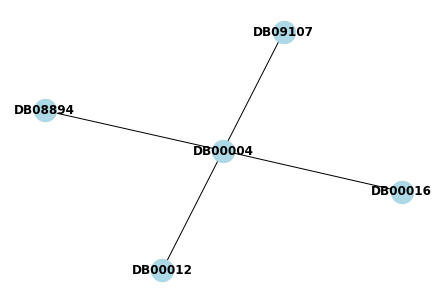

In [66]:
nx.draw(H, with_labels=True, font_weight='bold', node_color='lightblue', node_size=500)

In [67]:
G.nodes['DB00004']

{'bleeding': 0.0,
 'reduce': 0.0,
 'molecule': 0.0,
 'may': 0.0,
 'natural': 0.0,
 'except': 0.0,
 'fibrinogen': 0.0,
 'end': 0.0,
 'thrombocytopenia': 0.0,
 'medicinal': 0.0,
 'binds': 1.0,
 'blood': 0.0,
 'terminal': 0.0,
 'case': 0.0,
 'ceased': 0.0,
 'substitution': 0.0,
 'bayer': 0.0,
 'clotting': 0.0,
 'initiate': 0.0,
 'increased': 0.0,
 'anticoagulant': 0.0,
 'non': 0.0,
 'selective': 0.0,
 'cleave': 0.0,
 'produced': 1.0,
 'forms': 1.0,
 'bioavailability': 0.0,
 'cascade': 0.0,
 'recombinant': 1.0,
 'production': 0.0,
 'sulfate': 0.0,
 'risk': 0.0,
 'break': 0.0,
 'thereby': 0.0,
 'ability': 0.0,
 'induced': 0.0,
 'formation': 0.0,
 'prevents': 0.0,
 'injection': 0.0,
 'inhibitor': 0.0,
 'effective': 0.0,
 'via': 0.0,
 'potent': 0.0,
 'complex': 1.0,
 'cofactor': 0.0,
 'position': 0.0,
 'cells': 1.0,
 'values': 0.0,
 'high': 1.0,
 'action': 1.0,
 'suggested': 0.0,
 'found': 1.0,
 'clot': 0.0,
 'form': 0.0,
 'overdose': 0.0,
 'clots': 0.0,
 'highly': 0.0,
 'bond': 0.0,
 'endoge

In [67]:
#For nodes graph of DB00004
Hn =nx.subgraph(G,list(G.nodes['DB00004']))

In [161]:
 from matplotlib import pylab
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
cut = 1.00
xmax = cut * max(xx for xx, yy in pos.values())
ymax = cut * max(yy for xx, yy in pos.values())
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.savefig("my_graph.pdf",bbox_inches="tight")
pylab.close()

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


In [68]:
#Generate the number of connected components in our network
nx.number_connected_components(G)

1

In [69]:
nx.number_of_nodes(G)

5520

In [70]:
#we find that there are only one connected components so we can print it
largest_cc = max(nx.connected_components(G), key=len)
largest_cc

{'DB00209',
 'DB06606',
 'DB01495',
 'DB04868',
 'DB06589',
 'DB13143',
 'Q96N76',
 'DB00444',
 'DB04962',
 'DB12978',
 'DB07706',
 'DB06802',
 'Q7KZN9',
 'DB14010',
 'DB06678',
 'DB00289',
 'DB08911',
 'DB00468',
 'DB06733',
 'DB11703',
 'DB01548',
 'DB01609',
 'DB03034',
 'DB01624',
 'P54710',
 'DB06479',
 'DB01101',
 'DB09026',
 'DB01606',
 'DB00719',
 'DB08826',
 'DB13178',
 'DB00126',
 'DB05295',
 'DB01282',
 'P22680',
 'DB04695',
 'DB12726',
 'DB00216',
 'DB02691',
 'DB01395',
 'DB12077',
 'DB00579',
 'DB00619',
 'DB00837',
 'DB13172',
 'DB00118',
 'DB00566',
 'DB08735',
 'DB00176',
 'DB01252',
 'DB01685',
 'DB11661',
 'DB00230',
 'DB03560',
 'DB12335',
 'DB06777',
 'DB09288',
 'DB06272',
 'DB05942',
 'DB02587',
 'DB00828',
 'P22310',
 'DB13729',
 'DB13464',
 'DB11481',
 'DB03929',
 'Q9H6R3',
 'DB11627',
 'DB00748',
 'DB04557',
 'P04798',
 'DB09320',
 'DB15045',
 'DB12417',
 'DB10879',
 'DB11074',
 'DB15419',
 'DB00880',
 'DB11591',
 'O95989',
 'Q13233',
 'DB12523',
 'DB00273',
 

In [71]:
#From the drugbank. we find that all the drugs are begin with DB so we can use this feature 
#to divides between drugs and enzymes
degrees_drugs=[]
degrees_enzymes=[]
for n in G.nodes():
    if n[:2]=='DB':
        degrees_drugs.append(G.degree(n))
    else:
        degrees_enzymes.append(G.degree(n))

In [141]:
a=0
for n in G.nodes():
    if n[:2]=='DB':
        a=a
    else:
        a=a+1
a

1072

In [142]:
5520-1072

4448

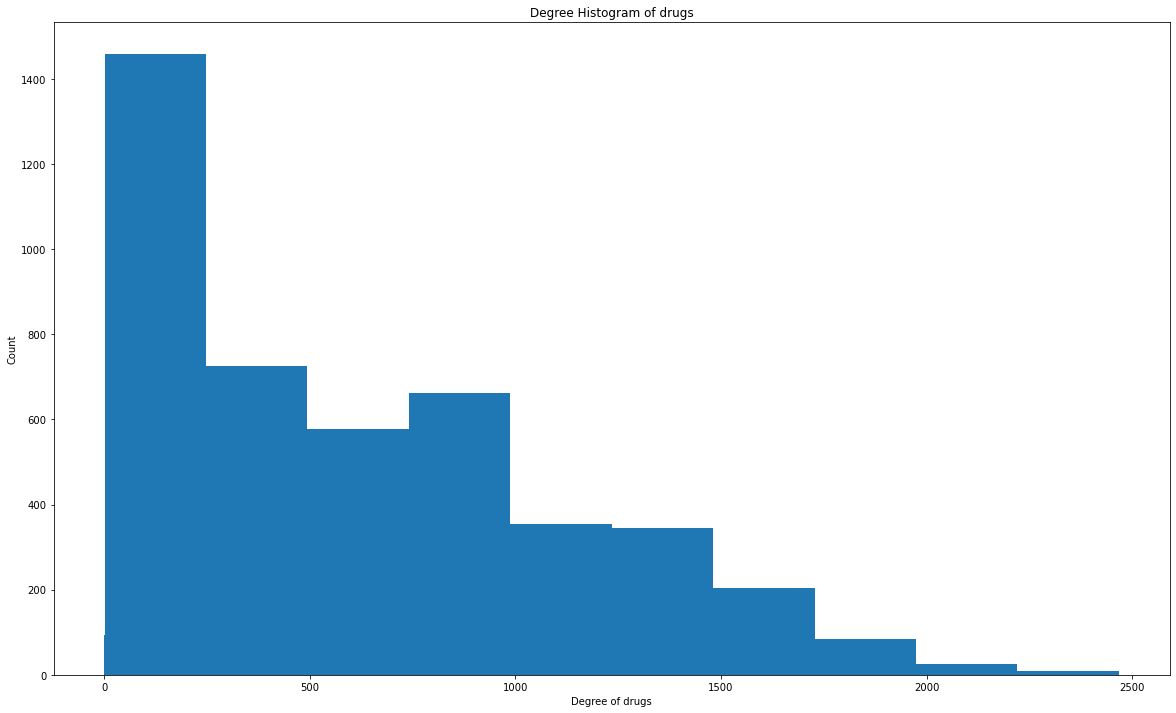

In [72]:
fig = plt.figure(figsize = (20, 12))
plt.bar(*np.unique(degrees_drugs, return_counts=True),width=0.8)
plt.hist(np.array(degrees_drugs))
plt.title("Degree Histogram of drugs")
plt.ylabel("Count")
plt.xlabel("Degree of drugs")
plt.show()

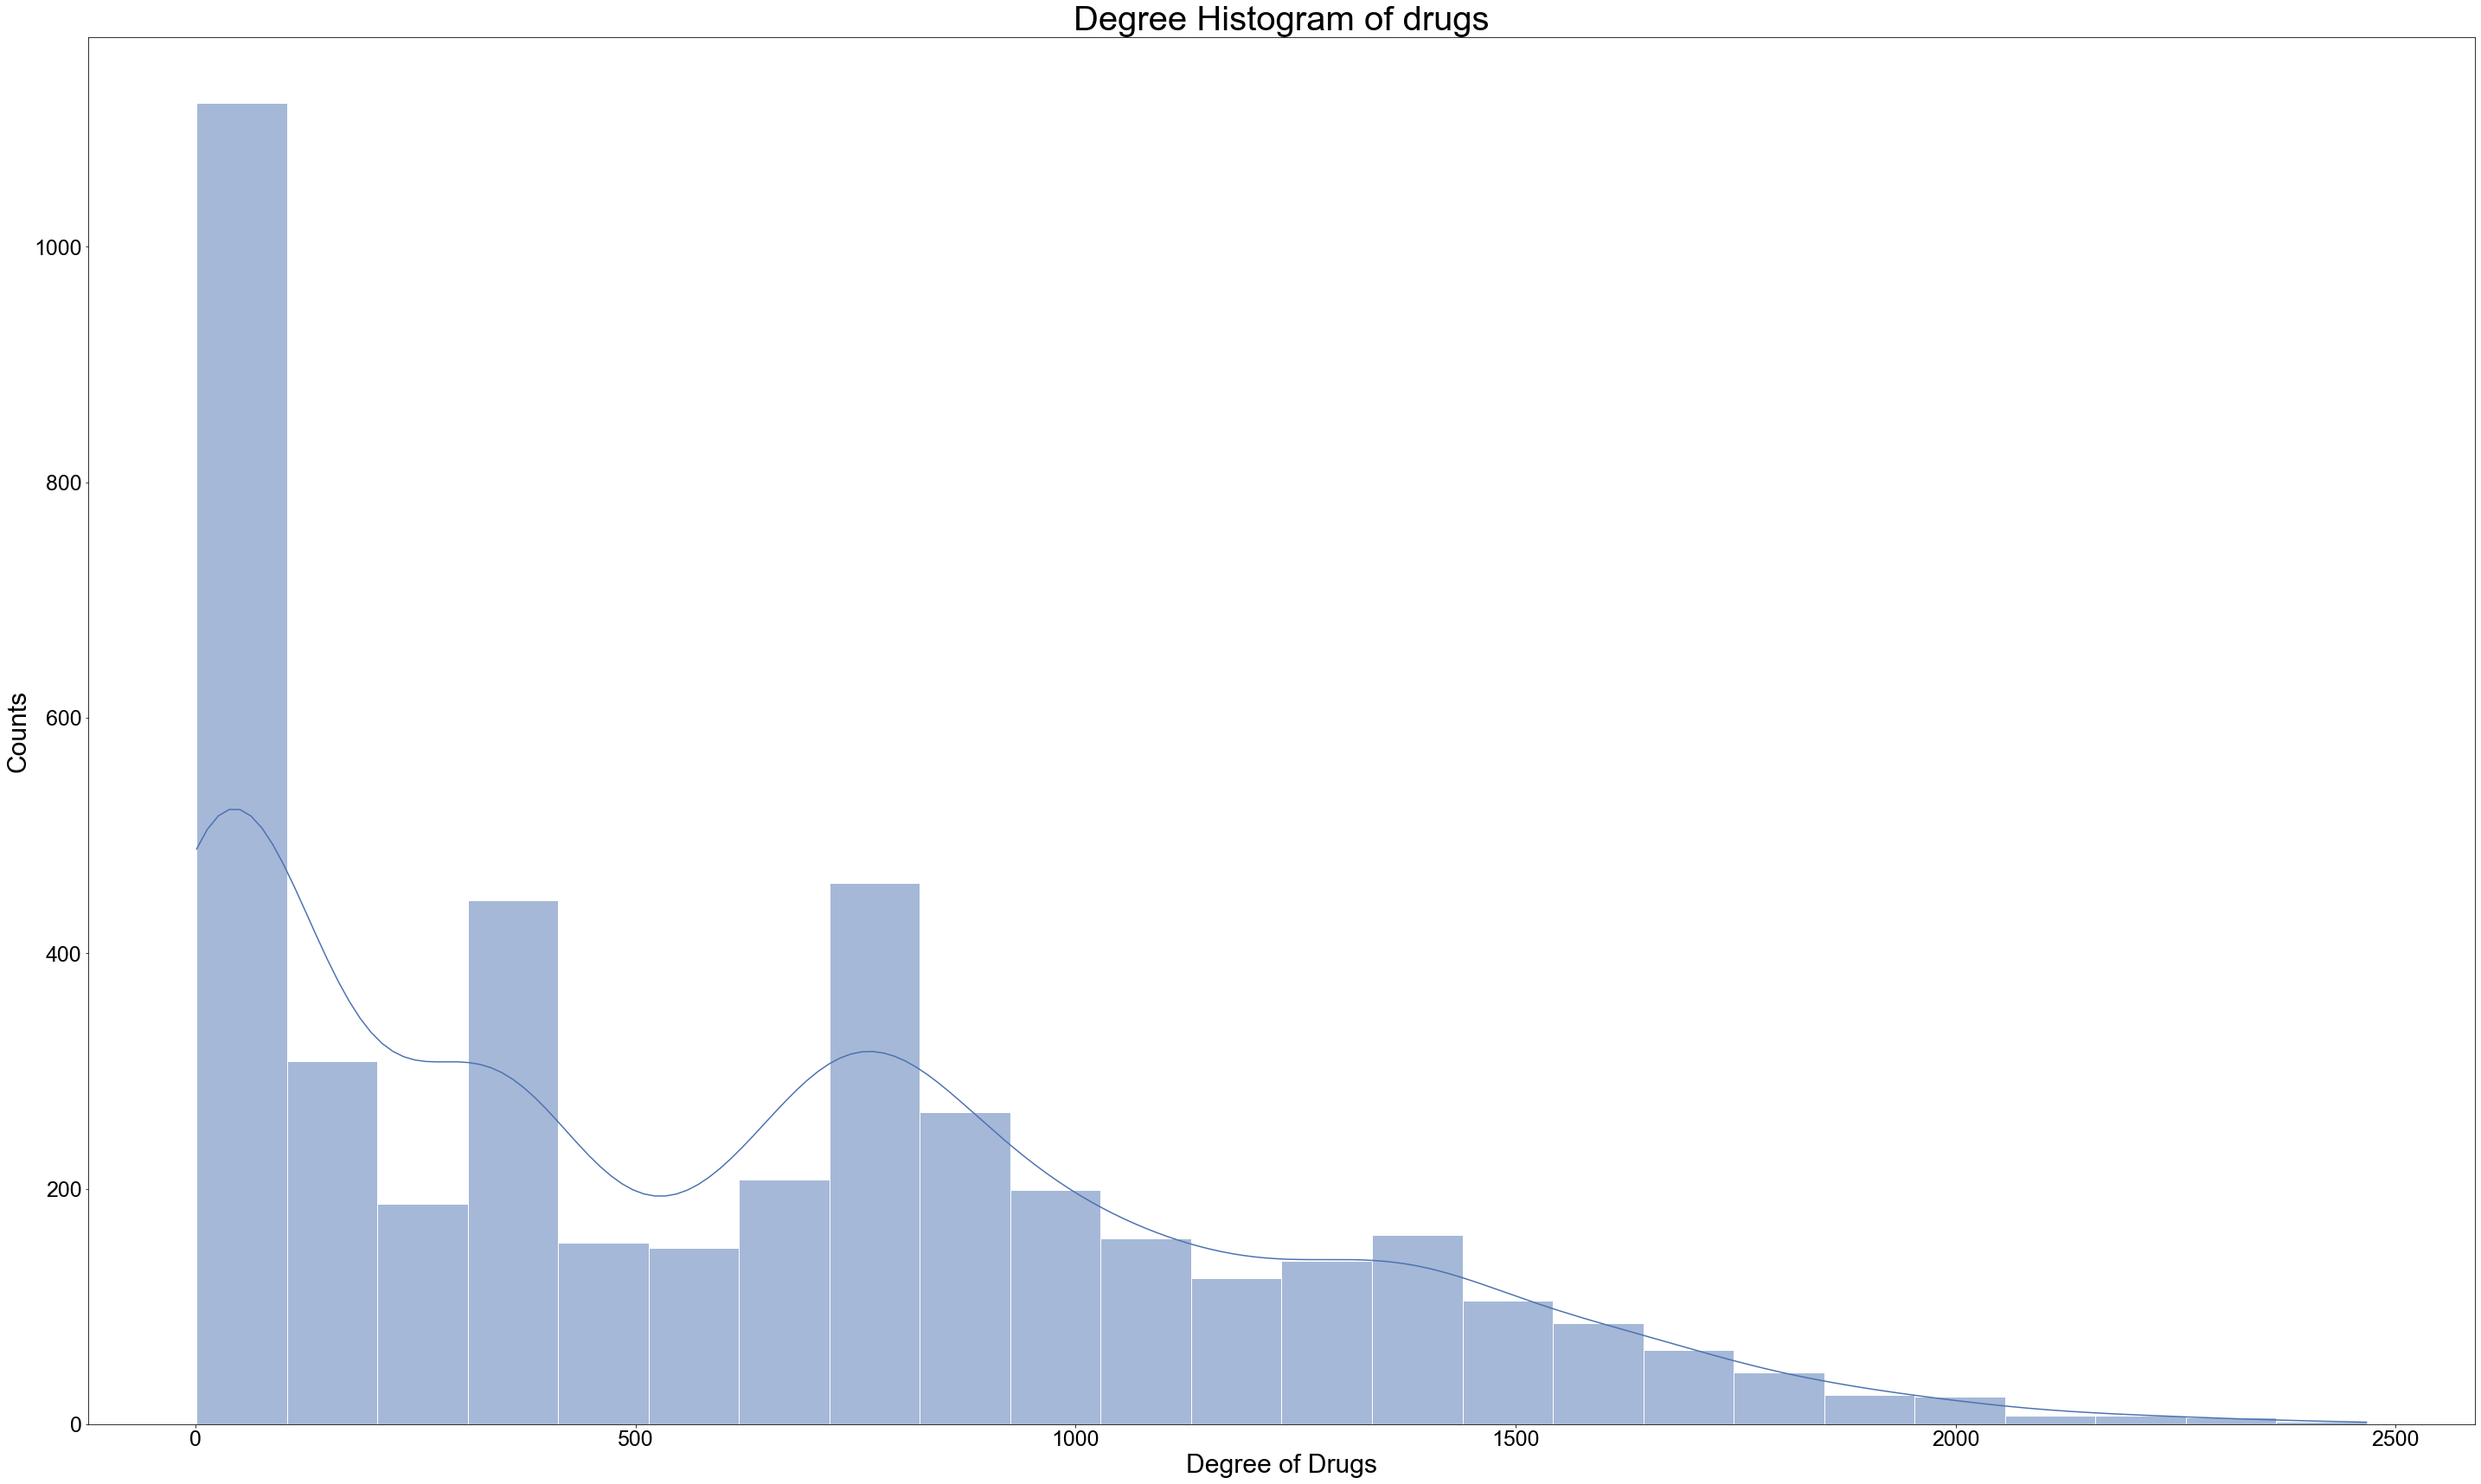

In [73]:
import seaborn as sb
cmap = sb.diverging_palette(220, 20, as_cmap=True)
fig, axes = plt.subplots(1, 1, figsize=(40,24), sharex=True, sharey=True)               
sb.set(font_scale = 4)
sb.set_theme(style='whitegrid')
res = sb.histplot(data=np.array(degrees_drugs),kde = True)
#res.set_xticklabels(xticklabels, fontsize = 25, rotation=0)
res.set_xlabel("Degree of Drugs", fontsize = 30)
res.set_ylabel("Counts", fontsize = 30)
res.set_title("Degree Histogram of drugs",fontsize = 40)
fig.tight_layout(rect=[0, 0, .9, 1])
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
fig.tight_layout()
plt.savefig("Degree of Drugs.pdf",bbox_inches="tight")

In [ ]:
fig = plt.figure(figsize = (20, 10))
plt.bar(*np.unique(degrees_enzymes, return_counts=True),width=0.8)

plt.title("Degree Histogram of enzymes")
plt.ylabel("Count")
plt.xlabel("Degree of enzymes")
plt.show()

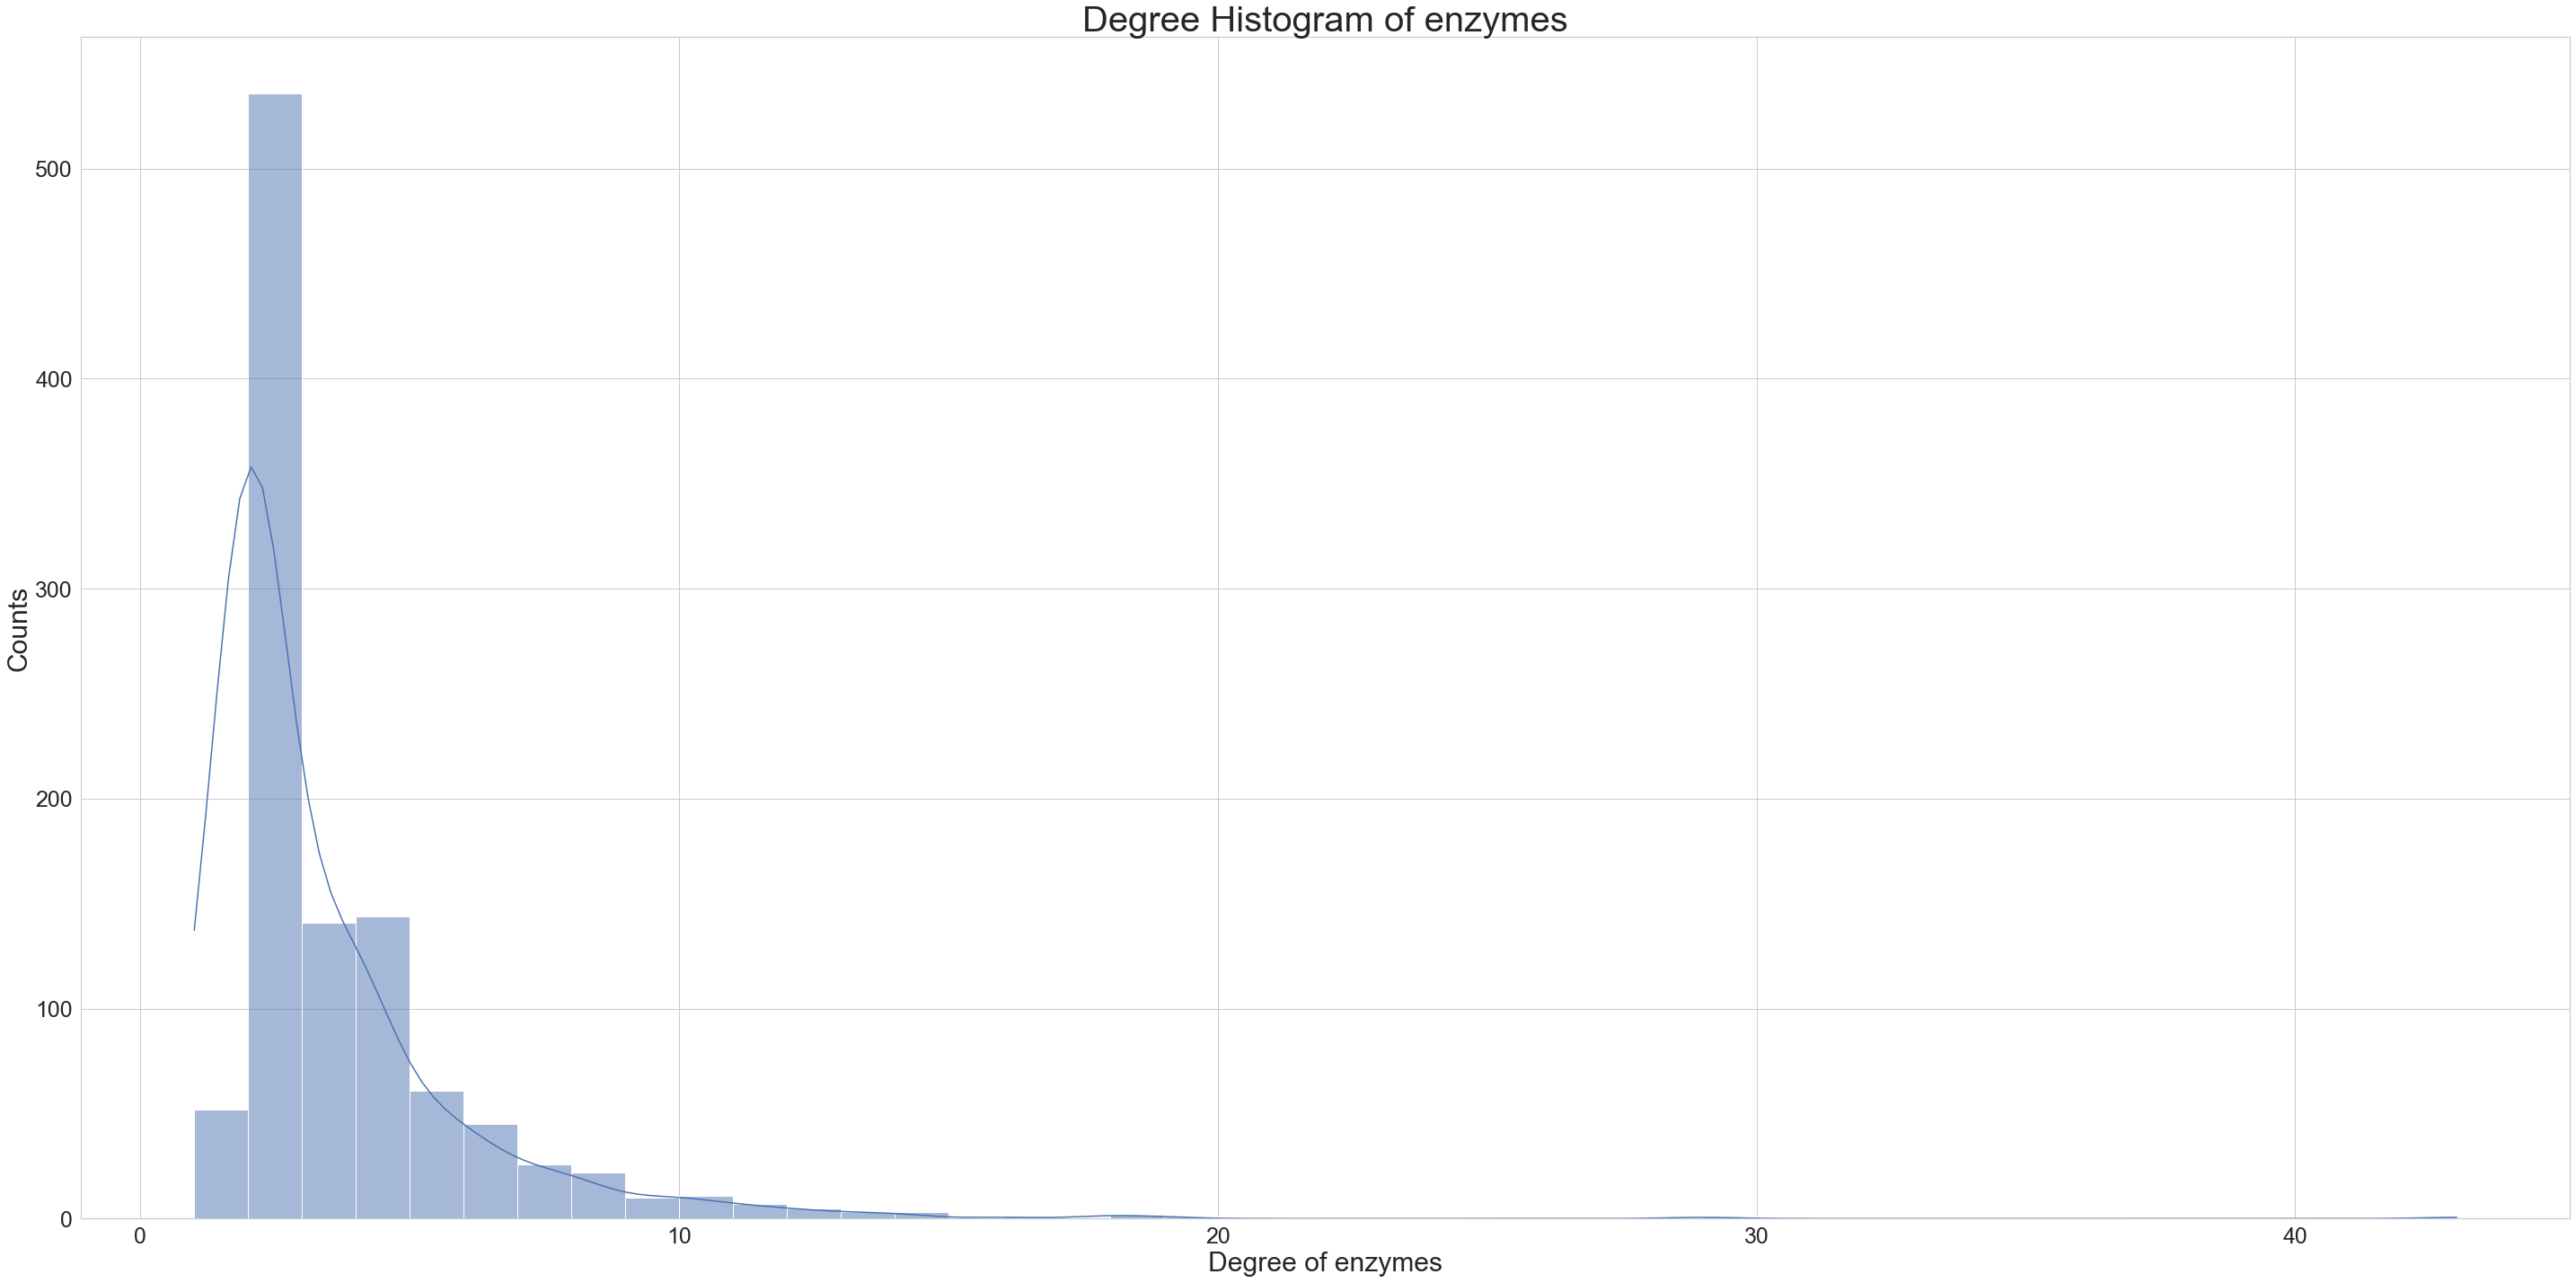

In [75]:
import seaborn as sb
cmap = sb.diverging_palette(220, 20, as_cmap=True)
fig, axes = plt.subplots(1, 1, figsize=(40,20), sharex=True, sharey=True)               
sb.set(font_scale = 4)
sb.set_theme(style='whitegrid')
res = sb.histplot(data=np.array(degrees_enzymes),binwidth=1,kde = True)
#res.set_xticklabels(xticklabels, fontsize = 25, rotation=0)
res.set_xlabel("Degree of enzymes", fontsize = 30)
res.set_ylabel("Counts", fontsize = 30)
res.set_title("Degree Histogram of enzymes",fontsize = 40)
fig.tight_layout(rect=[0, 0, .9, 1])
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
fig.tight_layout()
plt.savefig("Degree of enzymes.pdf",bbox_inches="tight")

In [76]:
a


'enzymes8'

In [77]:
#Now compute the degree centrality
degrees_c_drugs=[]
degrees_c_enzymes=[]
for n in G.nodes():
    if n[:2]=='DB':
        degrees_c_drugs.append(nx.degree_centrality(G)[n])
    else:
        degrees_c_enzymes.append(nx.degree_centrality(G)[n])

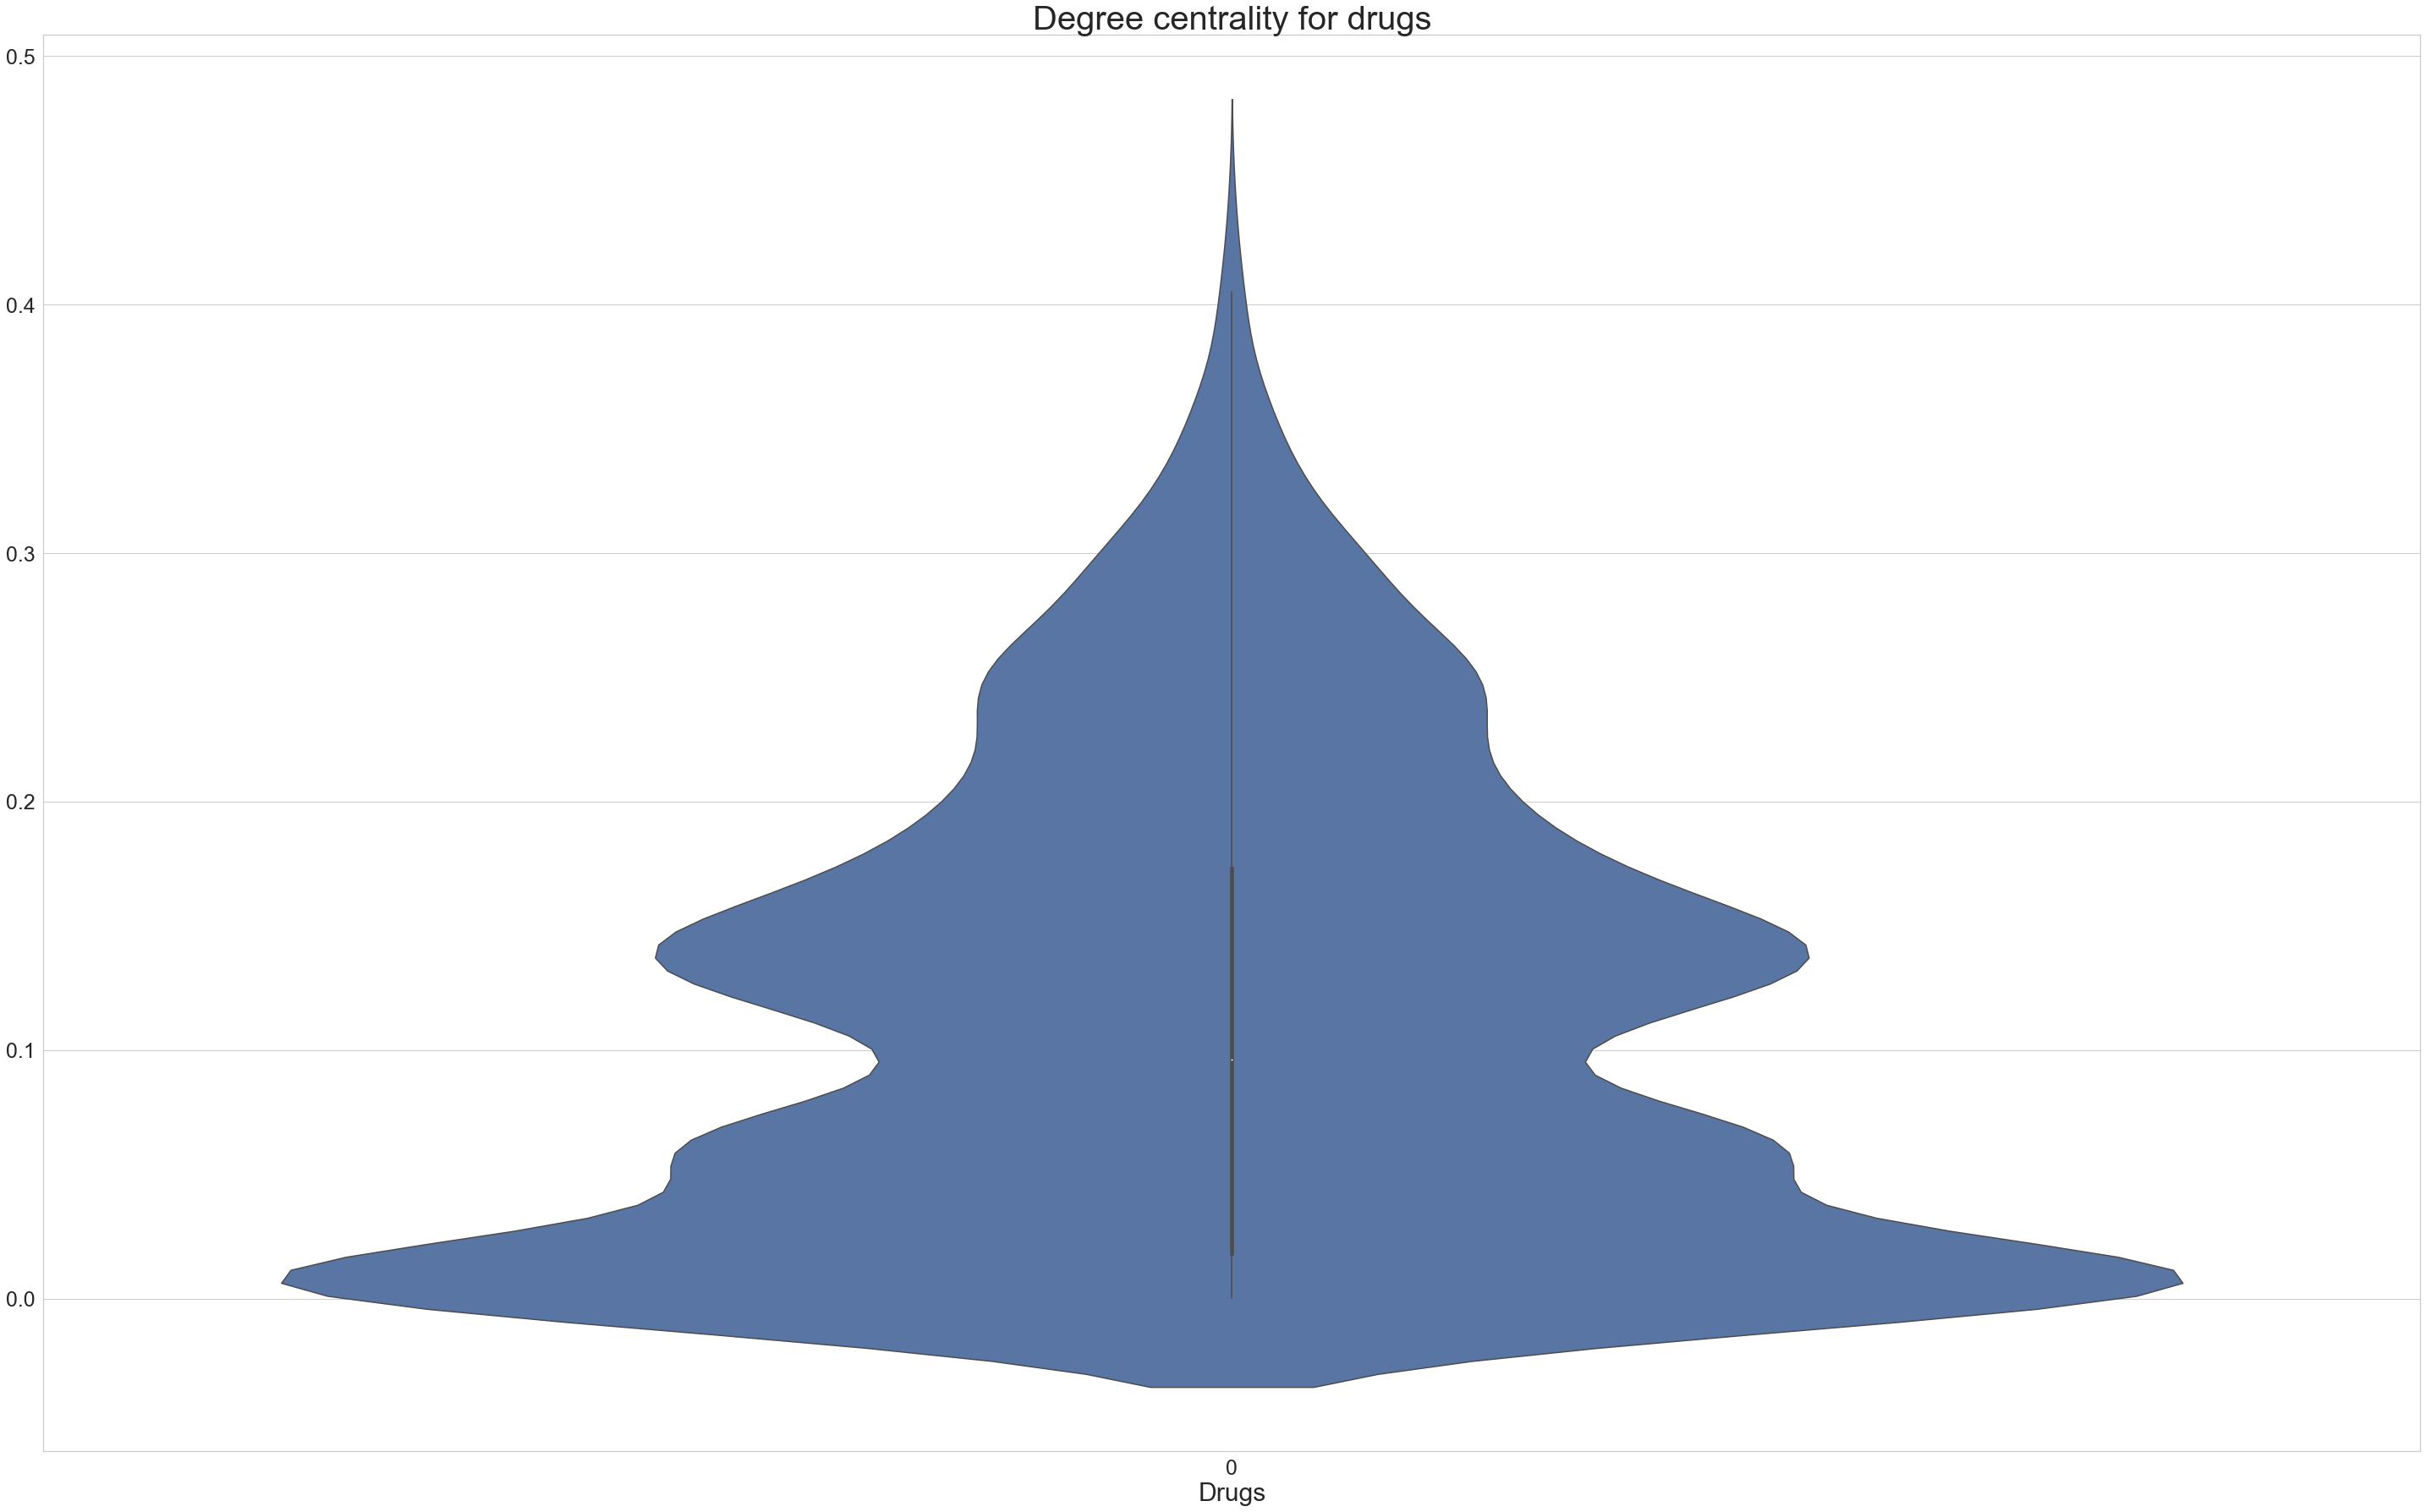

In [78]:
#Do the villinplot for degree centrality
import seaborn as sb
cmap = sb.diverging_palette(220, 20, as_cmap=True)
fig, axes = plt.subplots(1, 1, figsize=(40,25), sharex=True, sharey=True)               
sb.set(font_scale = 4)
sb.set_theme(style='whitegrid')
res = sb.violinplot(data=np.array(degrees_c_drugs))
#res.set_xticklabels(xticklabels, fontsize = 25, rotation=0)
res.set_xlabel("Drugs", fontsize = 30)
res.set_title("Degree centrality for drugs",fontsize = 40)
fig.tight_layout(rect=[0, 0, .9, 1])
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
fig.tight_layout()
plt.savefig("Degree centrality of drugs.pdf",bbox_inches="tight")

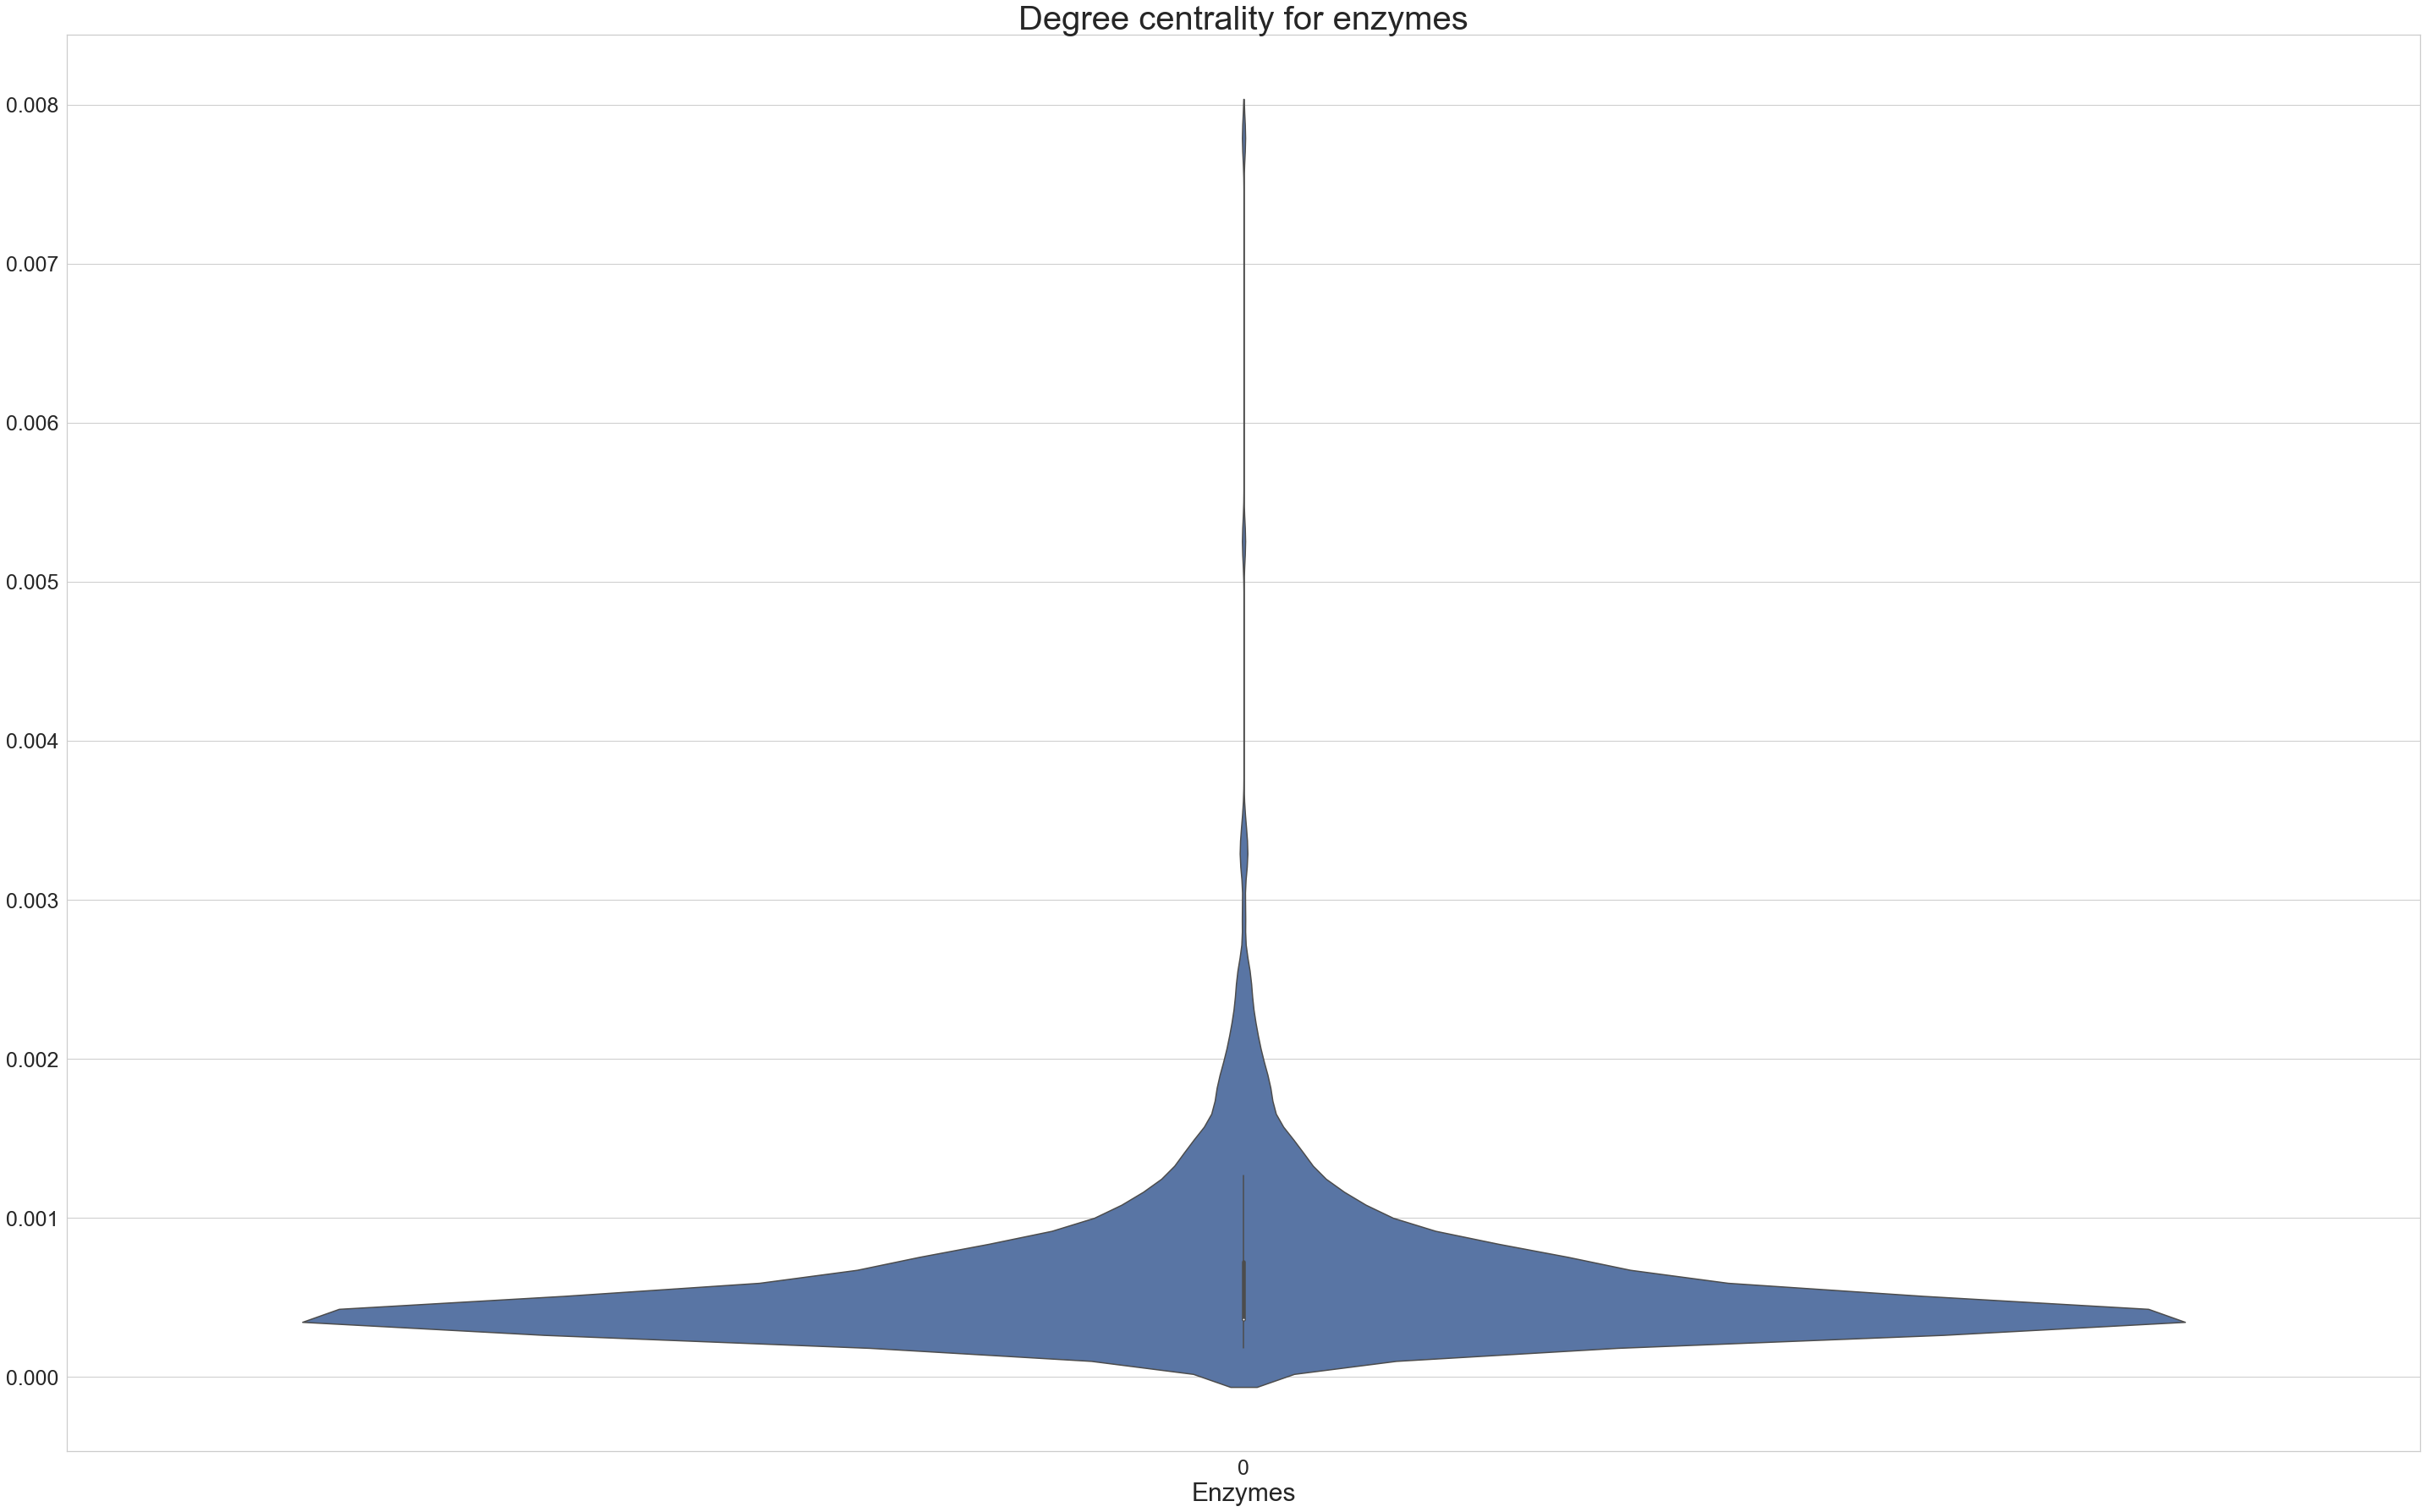

In [79]:
import seaborn as sb
cmap = sb.diverging_palette(220, 20, as_cmap=True)
fig, axes = plt.subplots(1, 1, figsize=(40,25), sharex=True, sharey=True)               
sb.set(font_scale = 4)
sb.set_theme(style='whitegrid')
res = sb.violinplot(data=np.array(degrees_c_enzymes))
#res.set_xticklabels(xticklabels, fontsize = 25, rotation=0)
res.set_xlabel("Enzymes", fontsize = 30)
res.set_title("Degree centrality for enzymes",fontsize = 40)
fig.tight_layout(rect=[0, 0, .9, 1])
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
fig.tight_layout()
plt.savefig("Degree centrality of enzymes.pdf",bbox_inches="tight")

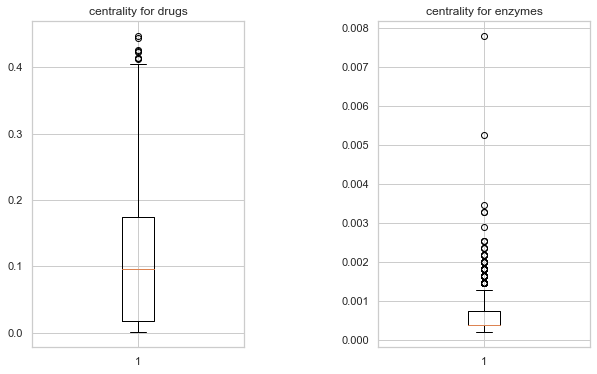

In [80]:
#plot the degree centrality for two type of nodes
fig = plt.figure(figsize=(10,6))
gs = fig.add_gridspec(1, 5)
ax1 = fig.add_subplot(gs[0,:2])
ax2 = fig.add_subplot(gs[0,3:])
ax1.boxplot(degrees_c_drugs)
ax1.set_title("centrality for drugs")
ax2.boxplot(degrees_c_enzymes)
ax2.set_title("centrality for enzymes")
# show plot
plt.show()

In [128]:
#Now compute the Clossness centrality
CL=nx.closeness_centrality(G)
degrees_cl_drugs=[]
degrees_cl_enzymes=[]
for n in G.nodes():
    if n[:2]=='DB':
        degrees_cl_drugs.append(CL[n])
    else:
        degrees_cl_enzymes.append(CL[n])

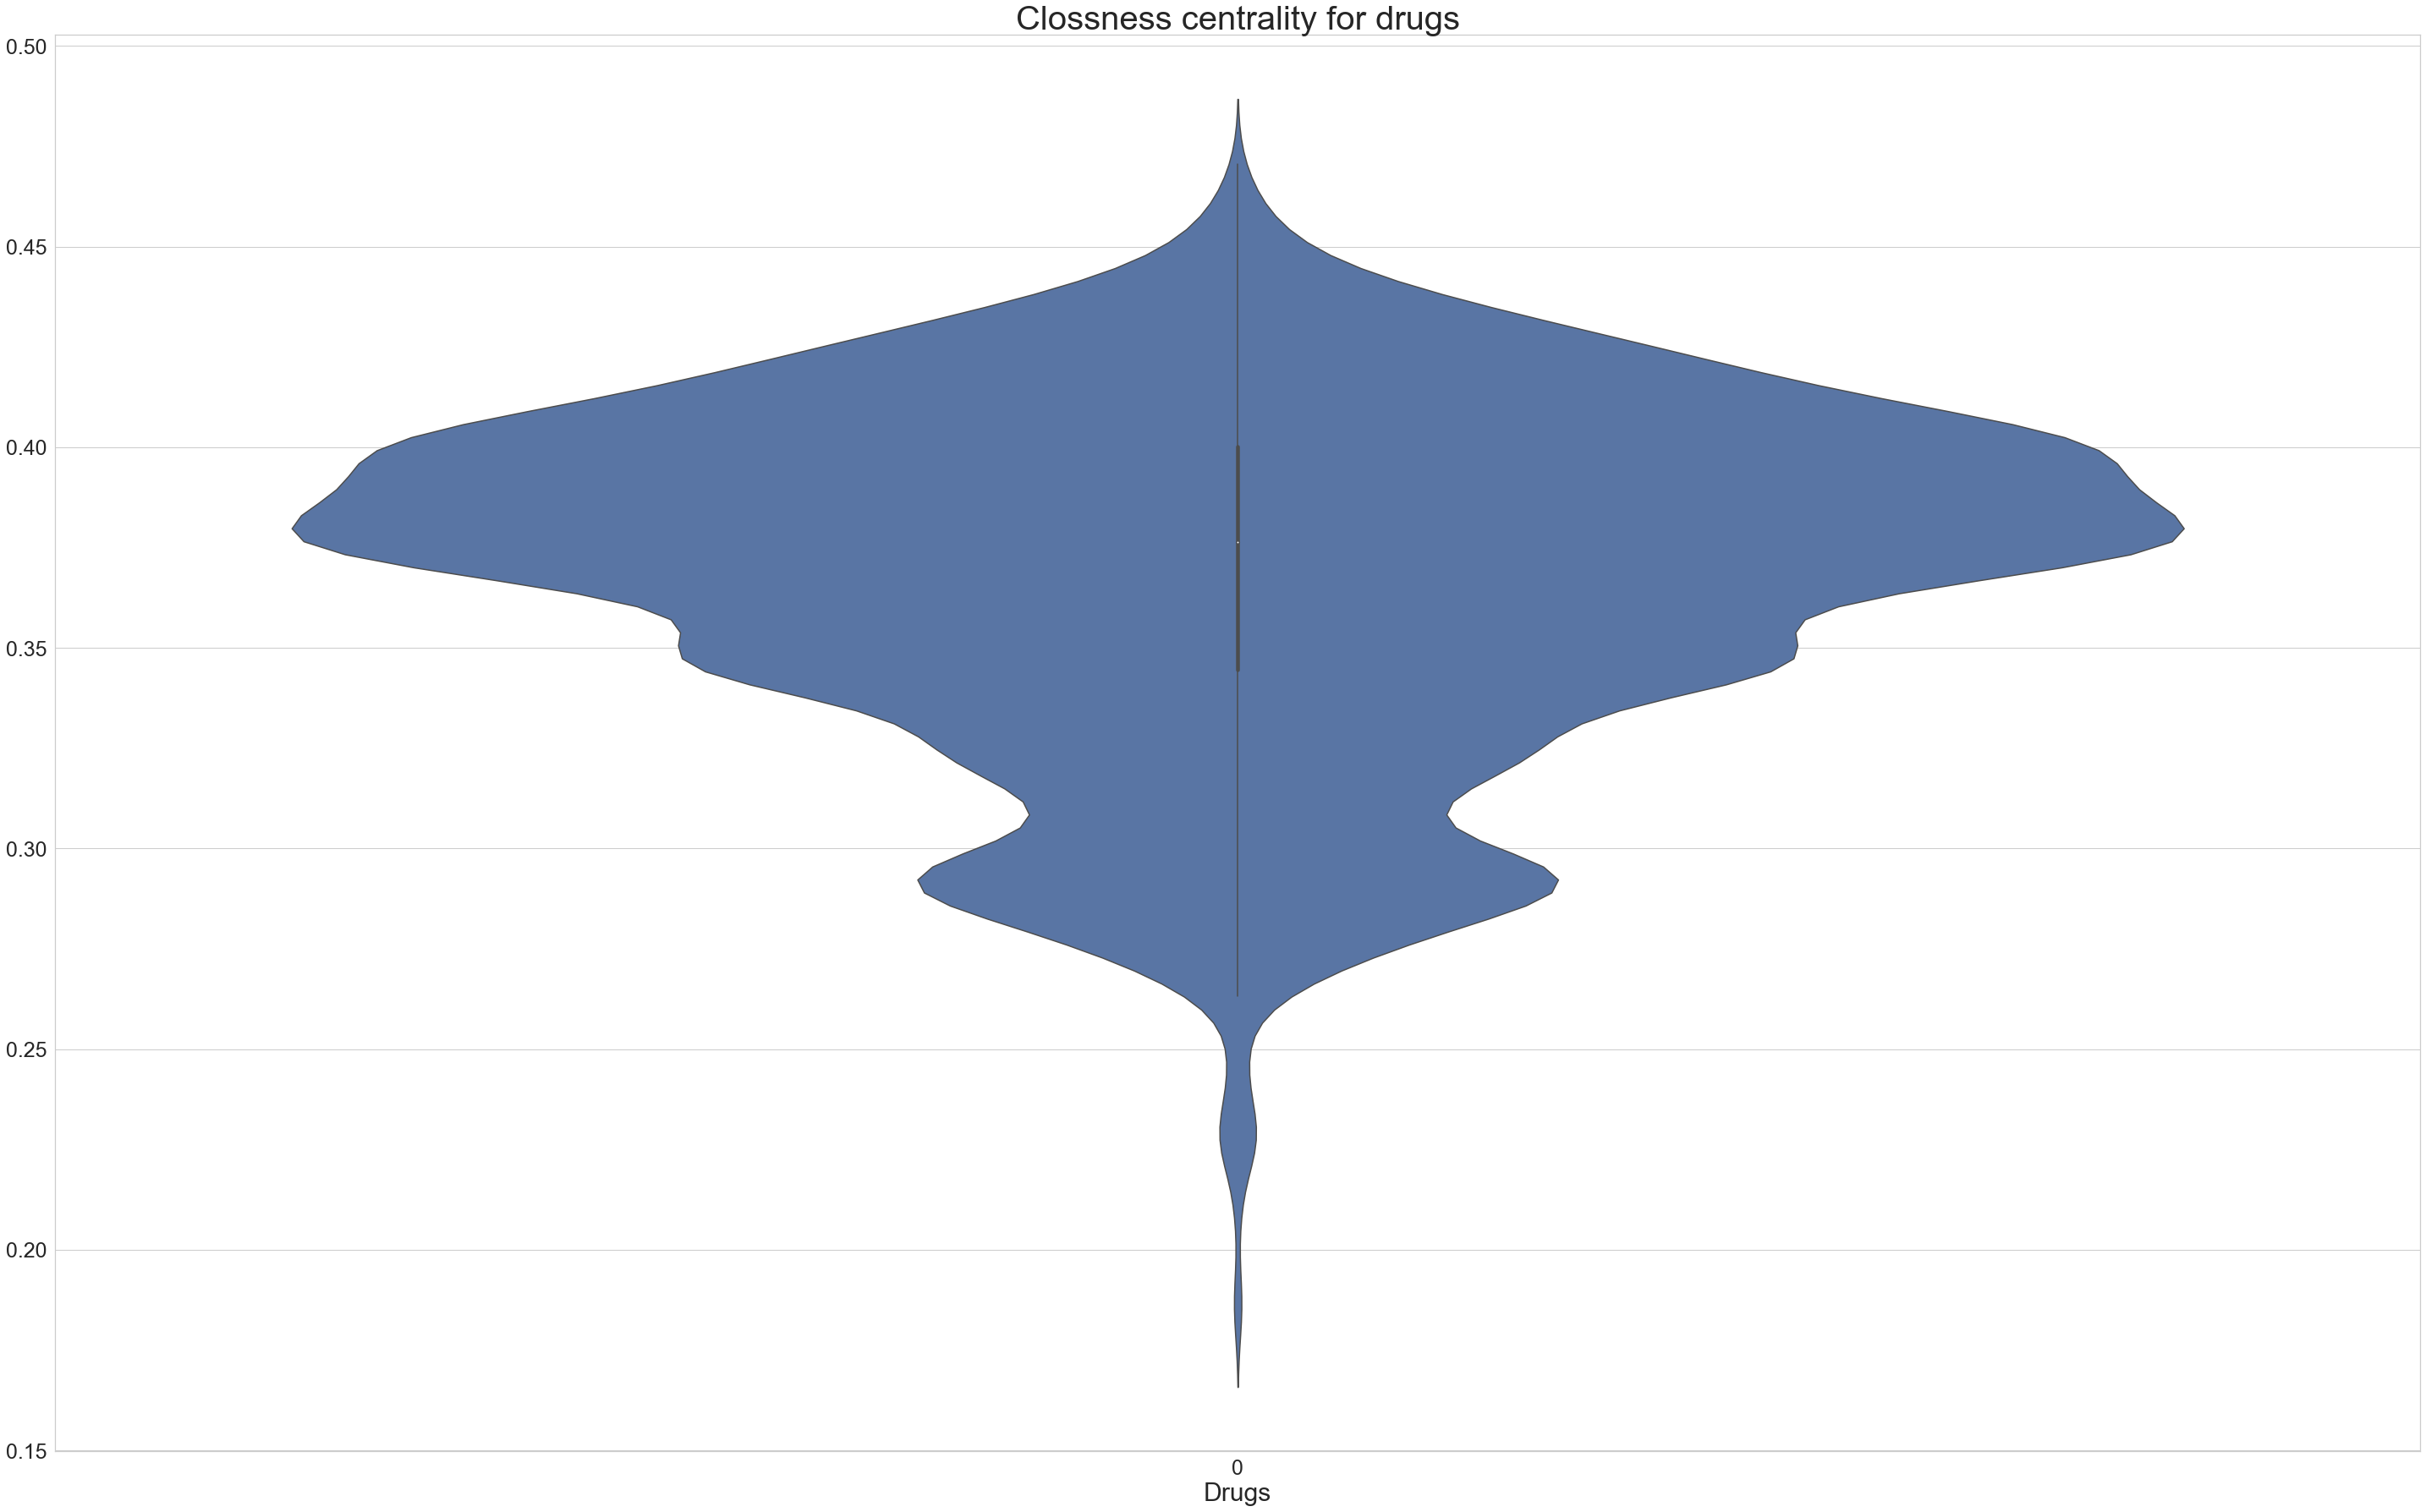

In [131]:
cmap = sb.diverging_palette(220, 20, as_cmap=True)
fig, axes = plt.subplots(1, 1, figsize=(40,25), sharex=True, sharey=True)               
sb.set(font_scale = 4)
sb.set_theme(style='whitegrid')
res = sb.violinplot(data=np.array(degrees_cl_drugs))
#res.set_xticklabels(xticklabels, fontsize = 25, rotation=0)
res.set_xlabel("Drugs", fontsize = 30)
res.set_title("Clossness centrality for drugs",fontsize = 40)
fig.tight_layout(rect=[0, 0, .9, 1])
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
fig.tight_layout()
plt.savefig("Clossness centrality of drugs.pdf",bbox_inches="tight")

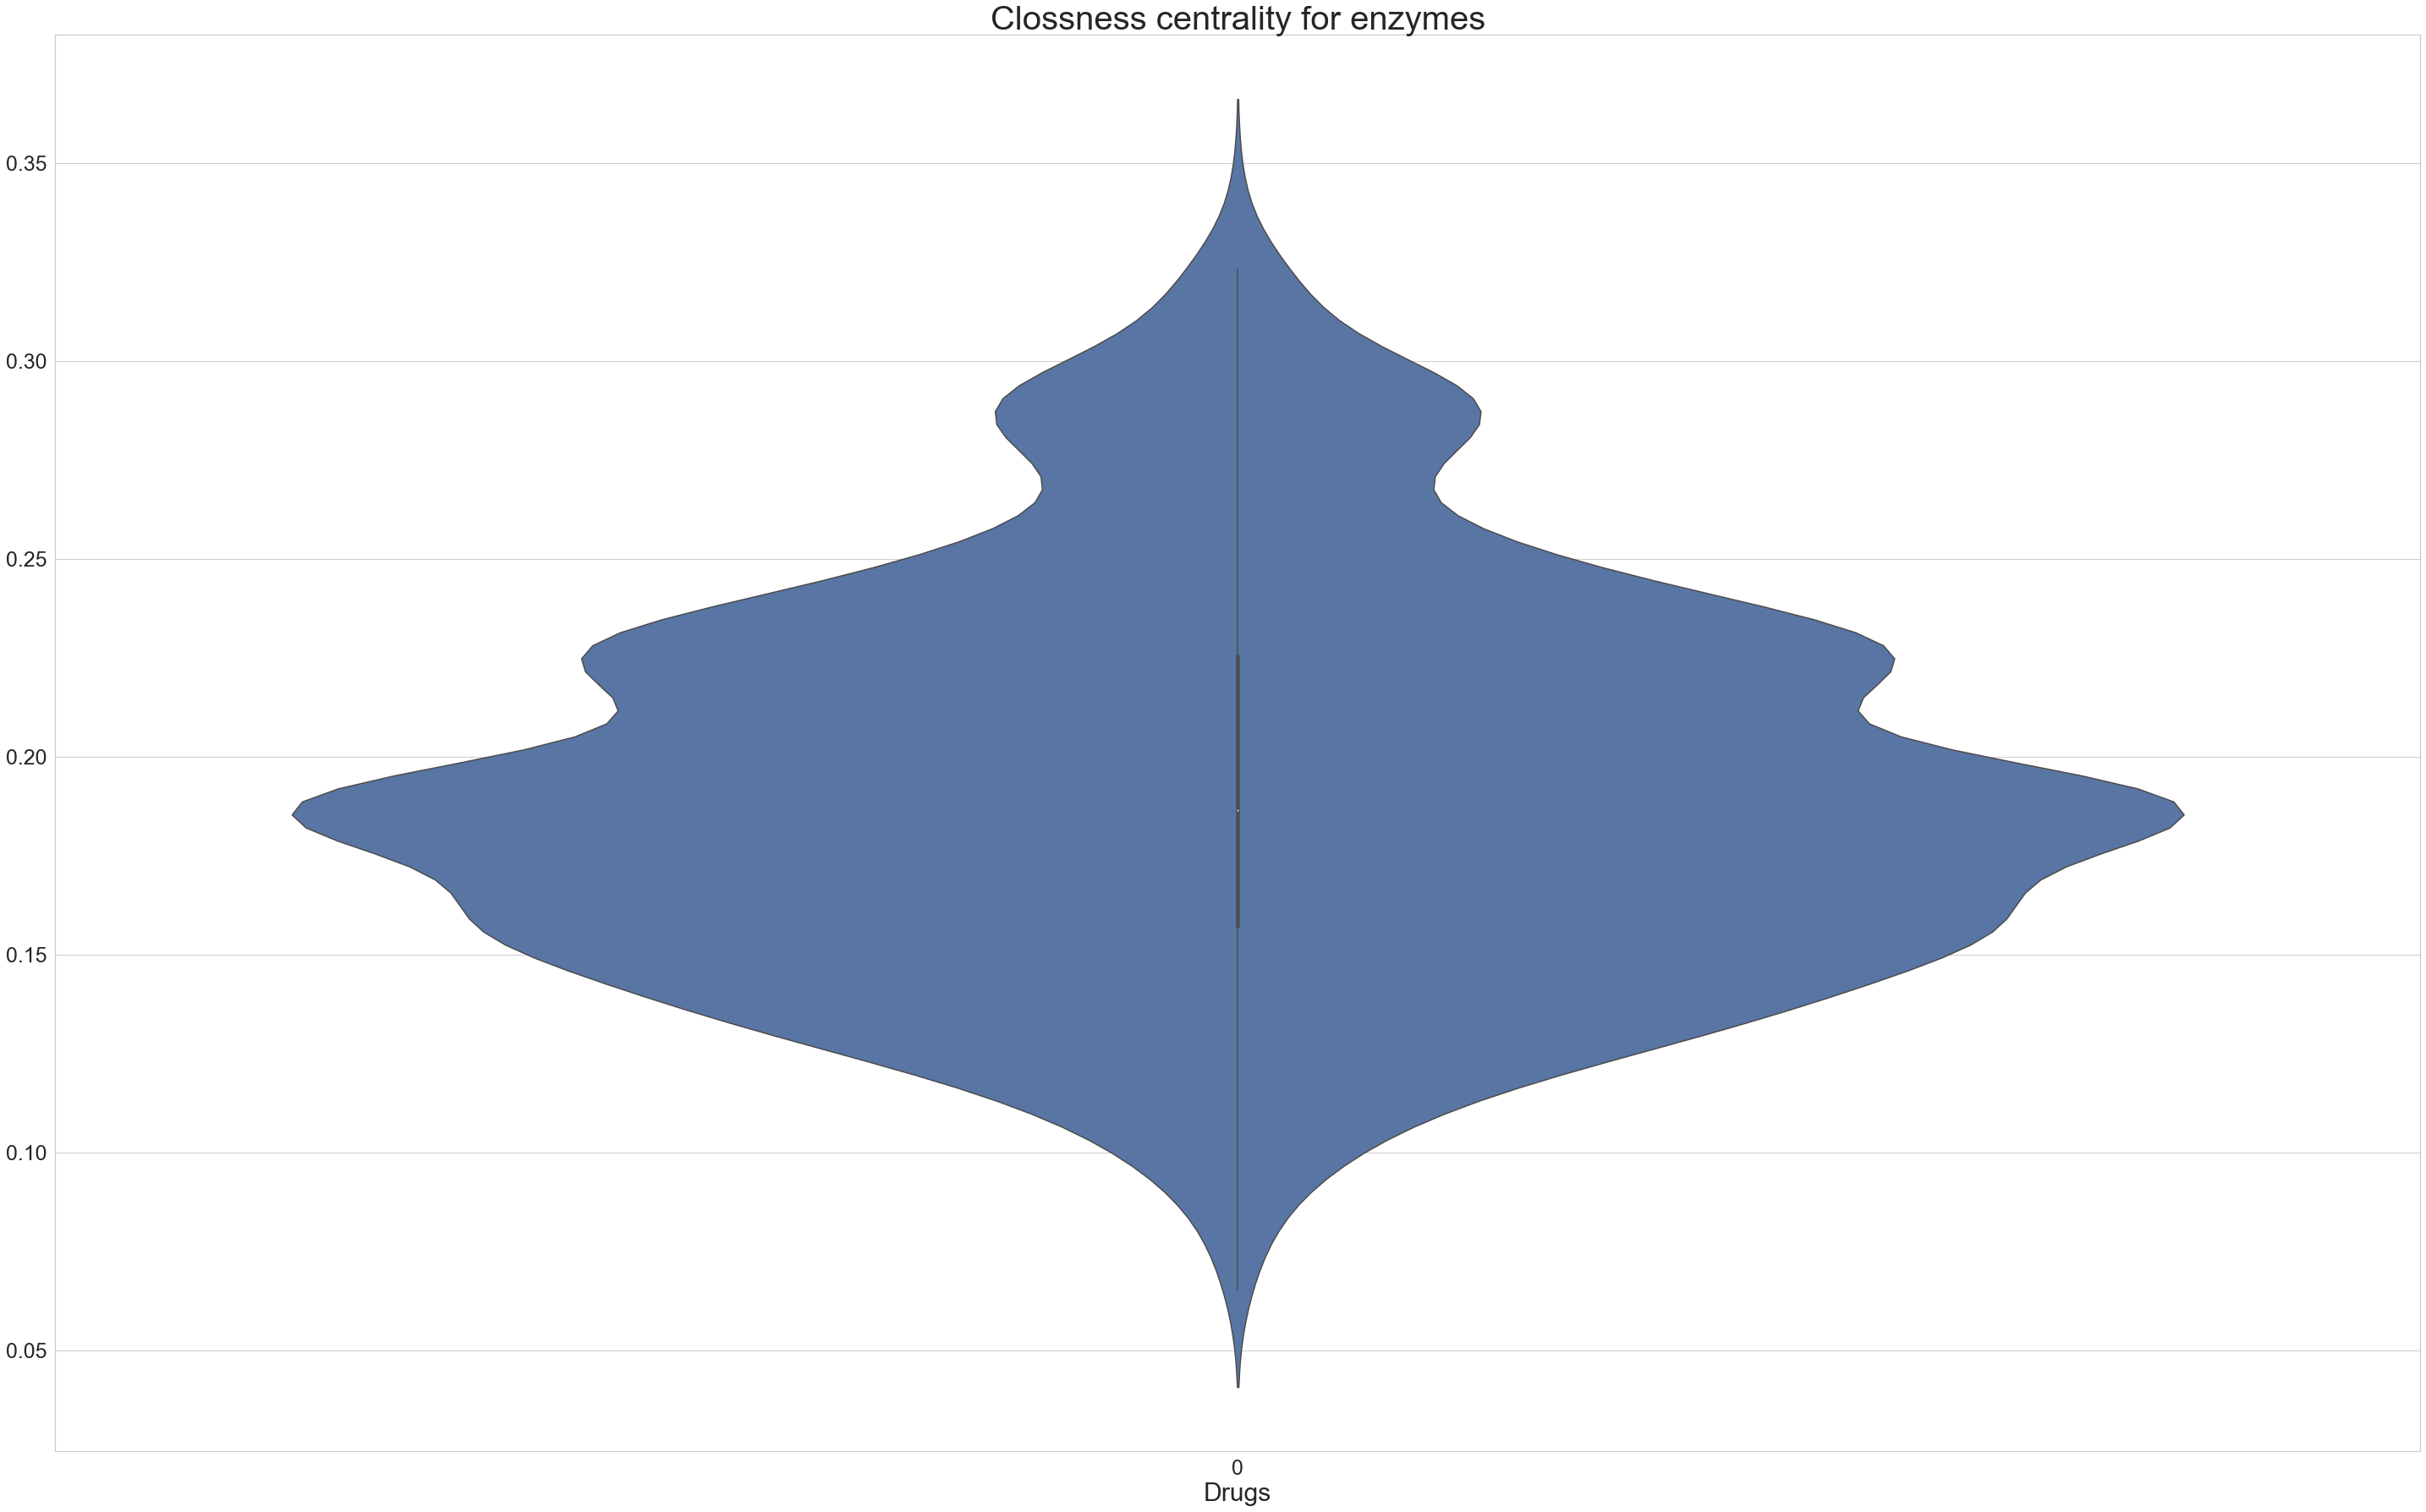

In [133]:
cmap = sb.diverging_palette(220, 20, as_cmap=True)
fig, axes = plt.subplots(1, 1, figsize=(40,25), sharex=True, sharey=True)               
sb.set(font_scale = 4)
sb.set_theme(style='whitegrid')
res = sb.violinplot(data=np.array(degrees_cl_enzymes))
#res.set_xticklabels(xticklabels, fontsize = 25, rotation=0)
res.set_xlabel("Drugs", fontsize = 30)
res.set_title("Clossness centrality for enzymes",fontsize = 40)
fig.tight_layout(rect=[0, 0, .9, 1])
for tick in axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)
for tick in axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)
fig.tight_layout()
plt.savefig("Clossness centrality of enzymes.pdf",bbox_inches="tight")

In [81]:
#Calculate the number of edges for each nodes
edge_dic={}
for n in G.nodes():
    edge_dic[n]=len(G.edges(n))
edge_dic    

{'DB00001': 638,
 'DB06605': 1197,
 'DB06695': 1310,
 'DB01254': 1417,
 'DB01609': 810,
 'DB01586': 288,
 'DB02123': 264,
 'DB02659': 463,
 'DB02691': 174,
 'DB03619': 243,
 'DB04348': 552,
 'DB05990': 368,
 'DB06777': 226,
 'DB08833': 184,
 'DB08834': 174,
 'DB08857': 174,
 'DB11622': 567,
 'DB11789': 174,
 'DB09075': 1271,
 'DB09053': 1045,
 'DB08935': 1014,
 'DB06228': 1430,
 'DB06206': 109,
 'DB09070': 496,
 'DB00932': 1007,
 'DB00013': 693,
 'DB00163': 340,
 'DB09030': 1110,
 'DB01381': 570,
 'DB01181': 1671,
 'DB00468': 2143,
 'DB00908': 2467,
 'DB00675': 1428,
 'DB00539': 618,
 'DB00806': 1585,
 'DB00686': 637,
 'DB00583': 897,
 'DB00255': 1221,
 'DB00269': 500,
 'DB00286': 1624,
 'DB00783': 1919,
 'DB00977': 1441,
 'DB01357': 1121,
 'DB04574': 1768,
 'DB04575': 510,
 'DB07931': 514,
 'DB09317': 1199,
 'DB09318': 1199,
 'DB09369': 496,
 'DB09381': 517,
 'DB11478': 496,
 'DB11674': 496,
 'DB13143': 496,
 'DB13386': 496,
 'DB13418': 496,
 'DB13952': 1829,
 'DB13953': 1475,
 'DB139

In [82]:
nx.number_of_edges(G)/((nx.number_of_nodes(G)-1)*nx.number_of_nodes(G)/2)

0.08824239583415396

In [139]:
nx.number_of_nodes(G)

5520

In [84]:
#Creat networkx grap only contains DDI
G_ddi = nx.from_edgelist(interactions)
nx.set_node_attributes(G_ddi, X.to_dict(orient='index'))
nx.set_node_attributes(G_ddi, ['Drug']*G.number_of_nodes(), "node_type") ### Make sure that the node is identified as a drug

In [95]:
#The total number of nodes in DDI network
n_ddi=nx.number_of_nodes(G_ddi)#number of nodes is 4294
edge_ddi=nx.number_of_edges(G_ddi)
edge_ddi/n_ddi**2#Not a direhted graph

0.07273317541683036

In [92]:
#Dimension of the graph
G_ddi.size()

1341086

In [103]:
import umap
%matplotlib inline
node_ddi = umap.UMAP()
mapper= node_ddi.fit(X)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

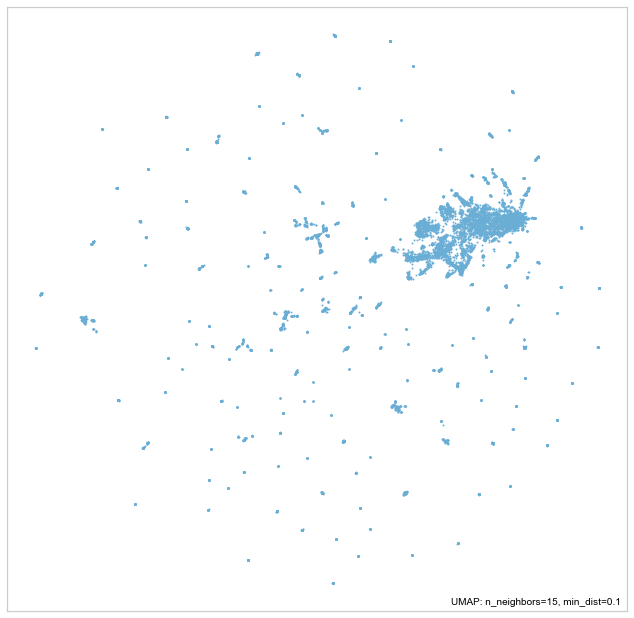

In [105]:
import umap.plot
umap.plot.points(mapper)

In [111]:
standard_embedding = umap.UMAP(random_state=42).fit_transform(X)

In [106]:
#We try to do node clustering based on node attribute
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(X)

In [109]:
import hdbscan
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=500,
).fit_predict(clusterable_embedding)

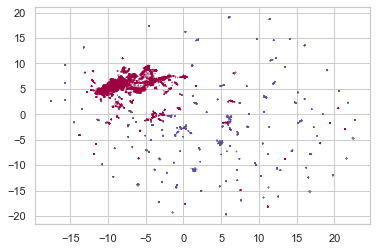

In [112]:
clustered = (labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=labels[clustered],
            s=0.1,
            cmap='Spectral');

In [137]:
X.to_dict(orient='index')


,bleeding,reduce,molecule,may,natural,except,fibrinogen,end,thrombocytopenia,medicinal,...,clbs119,inosars,3415a,nct04386616,uttr1147a,mstt1041a,bnt162,nct04380701,02c,cd73
DB00001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00013,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00036,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00054,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB00067,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DB12780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB12320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB11374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DB11398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
#Creat networkx grap only contains Pathway
G_Pathway = nx.Graph()
for index_name in dictionary.keys():
    if dictionary[index_name]['pathways'] !='None':
        for index_ in dictionary[index_name]['pathways'].keys():
            drugbank_id_in_pathway=[]
            enzeyme = []
            pathways=[]
            for a,level1 in dictionary[index_name]['pathways'][index_].items():
                if is_dict(level1):
                    if a[:5]=='drugs':
                        for level2,level3 in level1.items():
                             if level2=='drugbank_id in pathway':
                                    drugbank_id_in_pathway.append(level3)#trying to extract all drugbank id in order
                    if a[:7]=='enzymes':
                        for level2,level3 in level1.items():
                             enzeyme.append(level3)#trying to extract all enzeymes in order
            if len(drugbank_id_in_pathway)>1:
                for i in range(len(drugbank_id_in_pathway)-1):
                    G_Pathway.add_edge(drugbank_id_in_pathway[i],drugbank_id_in_pathway[i+1])
                if len(enzeyme)!=0:
                    G_Pathway.add_edge(drugbank_id_in_pathway[-1],enzeyme[0])
                    if len(enzeyme)>1:
                        for i in range(len(enzeyme)-1):
                            G_Pathway.add_edge(enzeyme[i],enzeyme[i+1])
                    
            else:
                if len(enzeyme)!=0:
                    G_Pathway.add_edge(drugbank_id_in_pathway[-1],enzeyme[0])
                    if len(enzeyme)>1:
                        for i in range(len(enzeyme)-1):
                            G_Pathway.add_edge(enzeyme[i],enzeyme[i+1])

In [118]:
n_Pathway=nx.number_of_nodes(G_Pathway)#number of nodes is 1717
edge_Pathway=nx.number_of_edges(G_Pathway)
edge_Pathway/n_Pathway**2

0.0010885017379054702

In [120]:
#The dimension of the pathway graph
G_Pathway.size()

3209